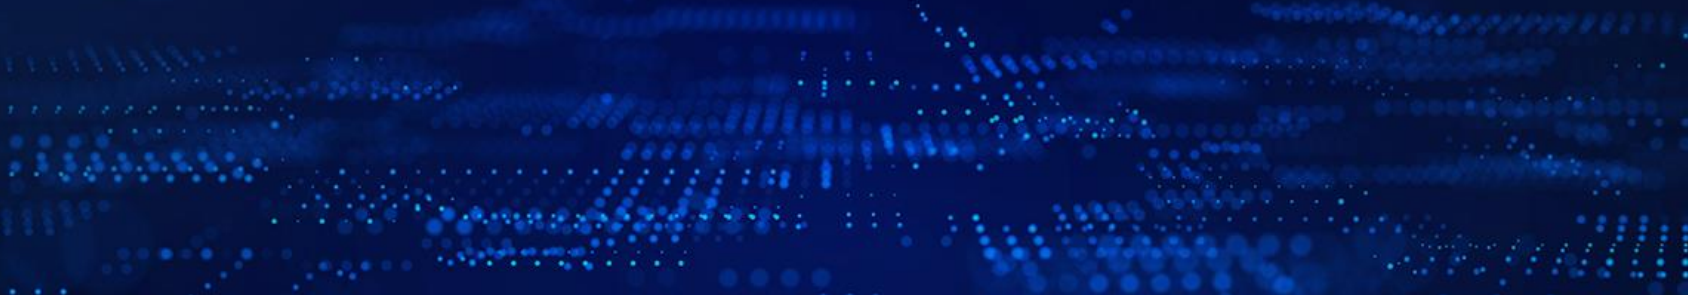

#***PREDICTING NET SALES OF STARTUPS IN TURKEY BY USING ENTREPRENEUR INFORMATION SYSTEM (EIS) DATA***

#BY

* Zeki Tekin

#Data Source

Entrepreneur Information System (EIS) of Turkey
https://gbs.sanayi.gov.tr/CRM


#Data Snapshot

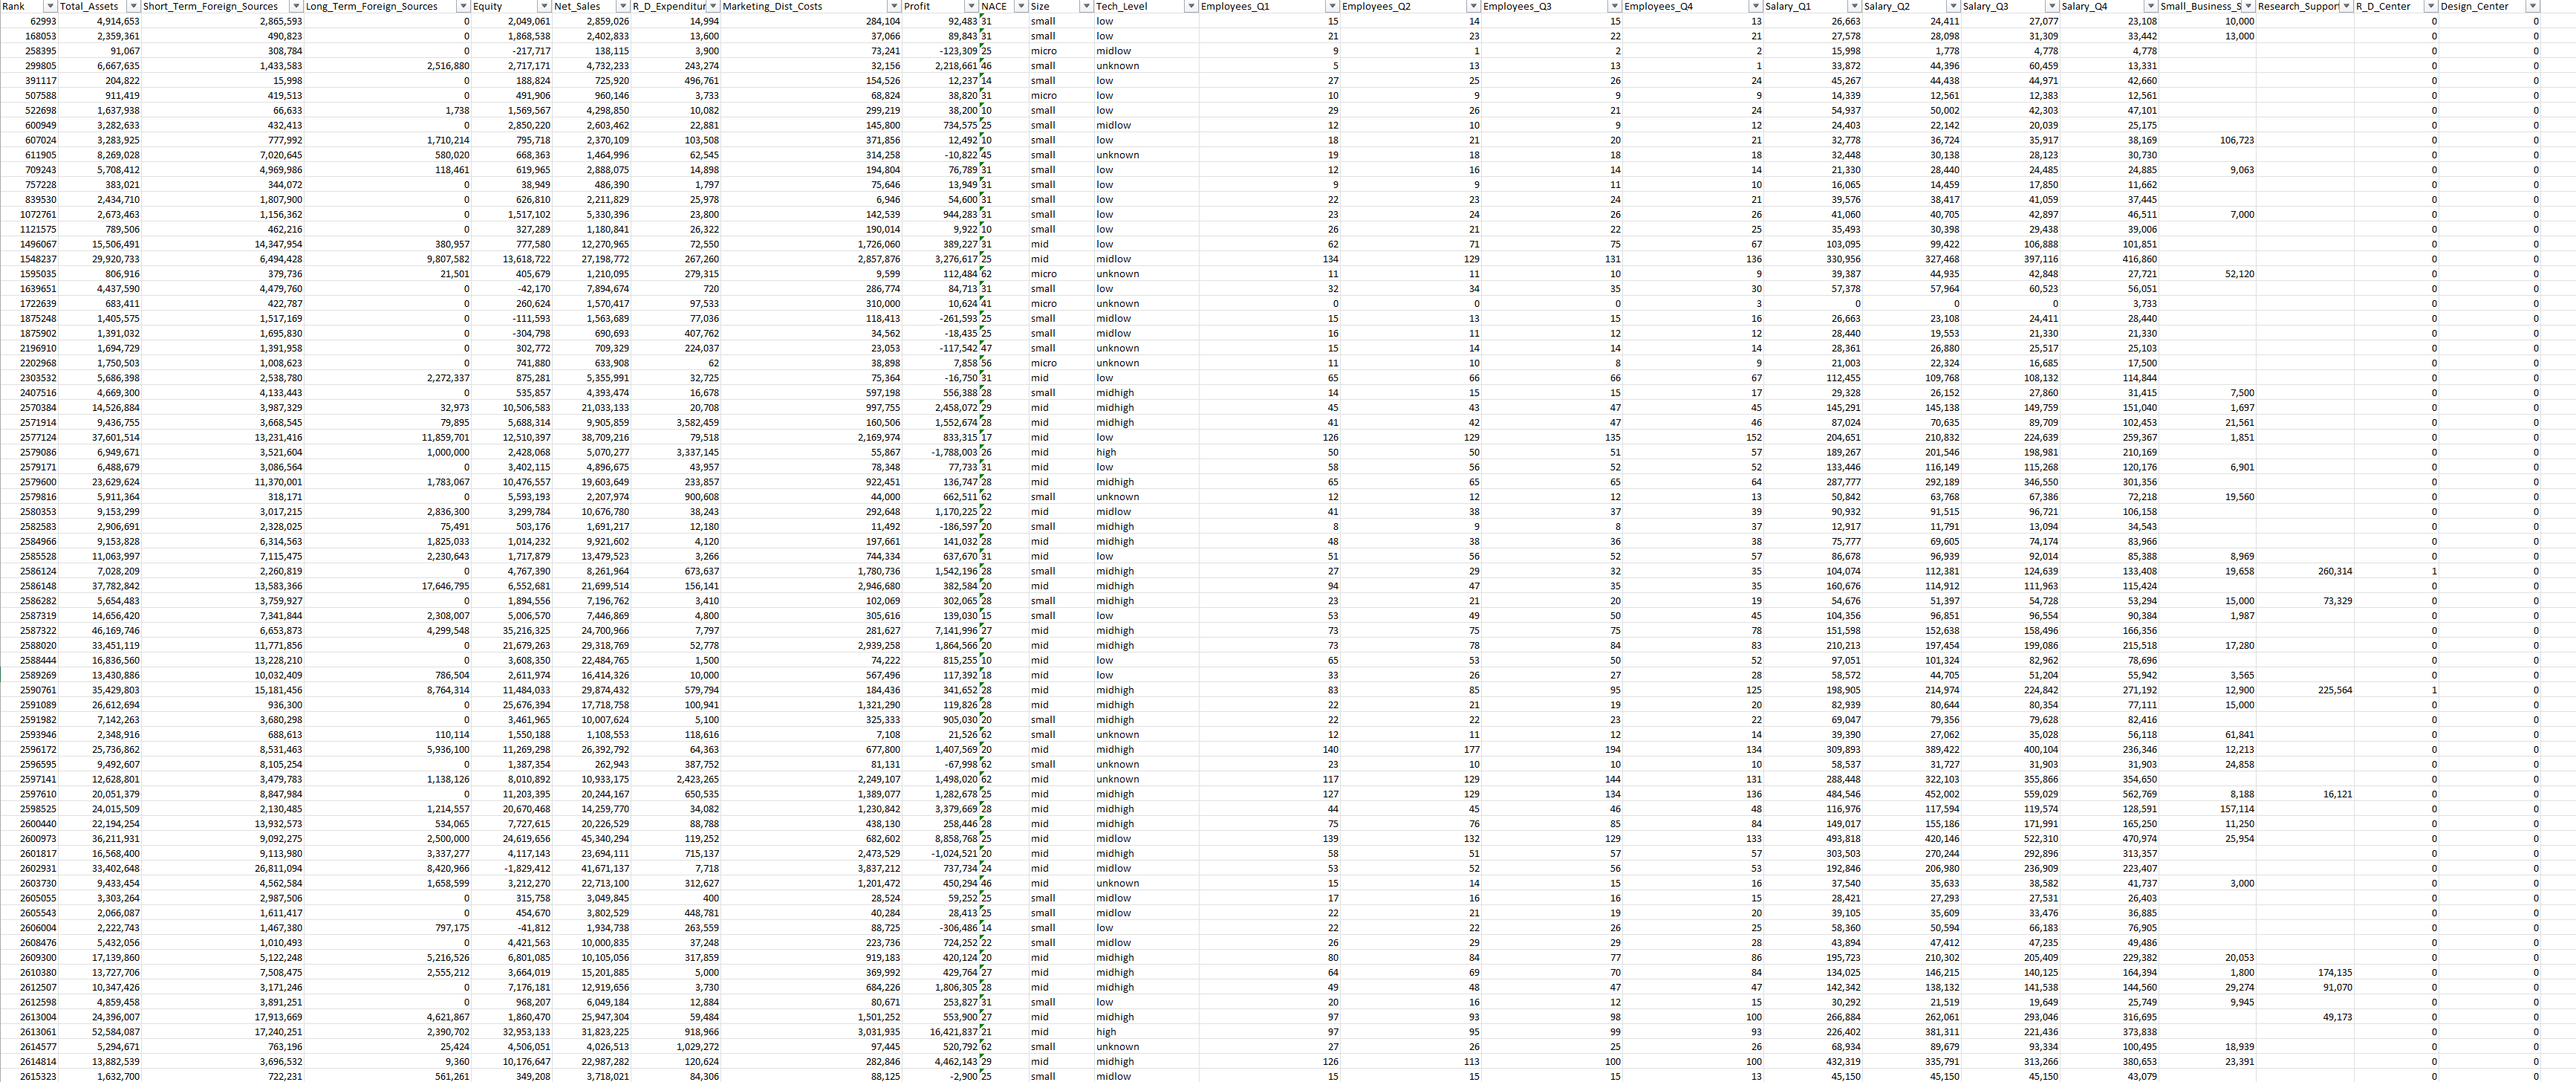

#Background

Entrepreneur Information System (EIS) of Turkey; is the project of collecting the data on the economic activities of the enterprises in the administrative records of different public institutions and organizations in a database within the framework of common standards and the integration of these data.


The main purpose of EIS, which was created within this framework, is to provide policy makers, decision makers, experts and researchers in public institutions and organizations, universities, research institutes and non-governmental organizations to design and implement economic, sectoral and regional policies and to measure efficiency at macro and micro level. It provides an environment where reliable and satisfying data/information will be presented.

In addition to the analyzes made at the macro level with EIS, studies with micro data can also be conducted. Thanks to the inter-institutional data integration carried out, data sets such as the financial statements of more than 3 million enterprises that generate commercial gains in the economy, their inter-sectoral and inter-provincial trade, Research and Small Business supports, intellectual and industrial rights, foreign trade and employment data can be accessed. In addition, data sets belonging to different institutions can be reported by cross-examination in EIS. For example, data such as employment of exporting companies, profit/loss status or financial performance of patented companies can be accessed.


#Purpose of the Project

The purpose of project is predicting net sales of companies based on the variables obtained from the database. Since the database is only open to certain individuals, permission is granted only for a portion of 2017 data. Accordingly,

  1)  A sample was taken from the 2017 EIS data within the scope of the project. Large enterprises and enterprises with zero total resources, net sales, marketing and distribution expenses and R&D expenditures were excluded when creating the sample data set. Therefore, the sample set is not representative of any real population.

  2) There are a total of 24 variables in the sample data, Initially, 11 of the selected variables is planned to be used in the regression model.
  
  3) Among selected variables, 'size', 'R&DCenter', and 'DesignCenter' data is categorical, the remaining 8 data (“total_assets”, “Equity”, “NetSales”, “R&D_Expenses”, “MarketingDistributionExpenses”, “Profit_Loss”, “Small_Business_Support” , “Research_Support”) is numerical data.

#Dependent Variable and Independent Variables

**Dependent Variable:**

Net_Sales


**Independent Variables:**

**Numerical:**

Total_Assets

Equity

Net_Sales

Marketing_Dist_Costs

Profit

Small_Business_Support

Research_Support

R_D_Expenditure


**Categorical:**

Size

R_D_Center

Design_Center


#Project Steps

We are planning to start with simple linear regression model and move forward by adding and/or removing variables based on statistical interpretation of results. So, our initial plan is summarized below:

#**Step-1: Exploratory Data Analysis and Simple Linear Regression**


In step 1, explanatory data analysis wil be conducted to get familiar with data. Then, a simple linear relationship model will be created between the variables **'Marketing_Dist_Costs'** and **'Net_Sales'** as a initial step before adding more variables. Finally, model will be evaluated statistically.

In [ ]:
#Load necessary packages
install.packages('plyr')
install.packages('corrplot')
install.packages('car')
install.packages('nortest')
install.packages('olsrr')
install.packages('xlsx')

library(ggplot2)
library(knitr)
library(readr)
library(dplyr)
library(tidyverse)
library(readxl)
library(scales)
library(corrplot)
library(plyr)
library(car)
library(nortest)
library(olsrr)
library(xlsx)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
devtools::install_github('IRkernel/repr')
install.packages("remotes")
remotes::install_github("hrbrmstr/albersusa")


Skipping install of 'repr' from a github remote, the SHA1 (f4780e5a) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




units (NA -> 0.8-0) [CRAN]
sf    (NA -> 1.0-8) [CRAN]


Installing 2 packages: units, sf

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘units’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘sf’ had non-zero exit status”


* checking for file ‘/tmp/Rtmp2tsU4I/remotes21f71dfb3314/hrbrmstr-albersusa-07aa87f/DESCRIPTION’ ... OK
* preparing ‘albersusa’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘albersusa_0.4.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/Rtmp2tsU4I/file21f756cf9083/albersusa_0.4.1.tar.gz’ had non-zero exit status”


In [ ]:
#Load packages
startup_data<-read_csv("startup_data.csv")
head(startup_data)

Rows: 1113 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Size, Tech_Level
dbl (8): Rank, NACE, Employees_Q1, Employees_Q2, Employees_Q3, Employees_Q4,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rank,Total_Assets,Short_Term_Foreign_Resources,Long_Term_Foreign_Resources,Equity,Net_Sales,R_D_Expenditure,Marketing_Dist_Costs,Profit,NACE,⋯,Employees_Q3,Employees_Q4,Salary_Q1,Salary_Q2,Salary_Q3,Salary_Q4,Small_Business_Support,Research_Support,R_D_Center,Design_Center
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
62993,4914653,2865593,0,2049061,2859026,14994,284104,92483,31,⋯,15,13,26663,24411,27077,23108,10000,NA,0,0
168053,2359361,490823,0,1868538,2402833,13600,37066,89843,31,⋯,22,21,27578,28098,31309,33442,13000,NA,0,0
258395,91067,308784,0,-217717,138115,3900,73241,-123309,25,⋯,2,2,15998,1778,4778,4778,NA,NA,0,0
299805,6667635,1433583,2516880,2717171,4732233,243274,32156,2218661,46,⋯,13,1,33872,44396,60459,13331,NA,NA,0,0
391117,204822,15998,0,188824,725920,496761,154526,12237,14,⋯,26,24,45267,44438,44971,42660,NA,NA,0,0
507588,911419,419513,0,491906,960146,3733,68824,38820,31,⋯,9,9,14339,12561,12383,12561,NA,NA,0,0


In [ ]:
#Drop the columns that will not be used
startup<-startup_data %>% select(2,5,6,7,8,9,11,21,22,23,24)
head(startup)

Total_Assets,Equity,Net_Sales,R_D_Expenditure,Marketing_Dist_Costs,Profit,Size,Small_Business_Support,Research_Support,R_D_Center,Design_Center
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
4914653,2049061,2859026,14994,284104,92483,small,10000,NA,0,0
2359361,1868538,2402833,13600,37066,89843,small,13000,NA,0,0
91067,-217717,138115,3900,73241,-123309,micro,NA,NA,0,0
6667635,2717171,4732233,243274,32156,2218661,small,NA,NA,0,0
204822,188824,725920,496761,154526,12237,small,NA,NA,0,0
911419,491906,960146,3733,68824,38820,micro,NA,NA,0,0


In [ ]:
summary(startup)

  Total_Assets           Equity             Net_Sales        R_D_Expenditure   
 Min.   :    73000   Min.   :-133611042   Min.   :  138115   Min.   :       2  
 1st Qu.:  6171268   1st Qu.:   1428984   1st Qu.: 5466654   1st Qu.:   16730  
 Median : 14450286   Median :   4384896   Median :12758869   Median :  108990  
 Mean   : 18633695   Mean   :   7123580   Mean   :16741710   Mean   :  590640  
 3rd Qu.: 25952106   3rd Qu.:   9945250   3rd Qu.:24993125   3rd Qu.:  430711  
 Max.   :369558115   Max.   :  98548707   Max.   :93658201   Max.   :57774498  
                                                                               
 Marketing_Dist_Costs     Profit              Size          
 Min.   :      12     Min.   :-67260832   Length:1113       
 1st Qu.:  140389     1st Qu.:    63167   Class :character  
 Median :  470545     Median :   377723   Mode  :character  
 Mean   : 1090687     Mean   :   987979                     
 3rd Qu.: 1349447     3rd Qu.:  1407569                

In [ ]:
#It seems like there are some missing values in Research_Support and Small_Business_Support columns.
na_Research_Support<-sum(is.na(startup$Research_Support))
na_Small_Business_Support<-sum(is.na(startup$Small_Business_Support))

print(paste0("Number of missing values for ID is ", na_Research_Support))
print(paste0("Number of missing values for ID is ", na_Small_Business_Support))

[1] "Number of missing values for ID is 951"
[1] "Number of missing values for ID is 627"


In [ ]:
#Since NA for these columns means that they are not getting any support from government, lets replace them with 0's.
startup[is.na(startup)] = 0
summary(startup)

  Total_Assets           Equity             Net_Sales        R_D_Expenditure   
 Min.   :    73000   Min.   :-133611042   Min.   :  138115   Min.   :       2  
 1st Qu.:  6171268   1st Qu.:   1428984   1st Qu.: 5466654   1st Qu.:   16730  
 Median : 14450286   Median :   4384896   Median :12758869   Median :  108990  
 Mean   : 18633695   Mean   :   7123580   Mean   :16741710   Mean   :  590640  
 3rd Qu.: 25952106   3rd Qu.:   9945250   3rd Qu.:24993125   3rd Qu.:  430711  
 Max.   :369558115   Max.   :  98548707   Max.   :93658201   Max.   :57774498  
 Marketing_Dist_Costs     Profit              Size          
 Min.   :      12     Min.   :-67260832   Length:1113       
 1st Qu.:  140389     1st Qu.:    63167   Class :character  
 Median :  470545     Median :   377723   Mode  :character  
 Mean   : 1090687     Mean   :   987979                     
 3rd Qu.: 1349447     3rd Qu.:  1407569                     
 Max.   :22466915     Max.   : 54445702                     
 Small_Busine

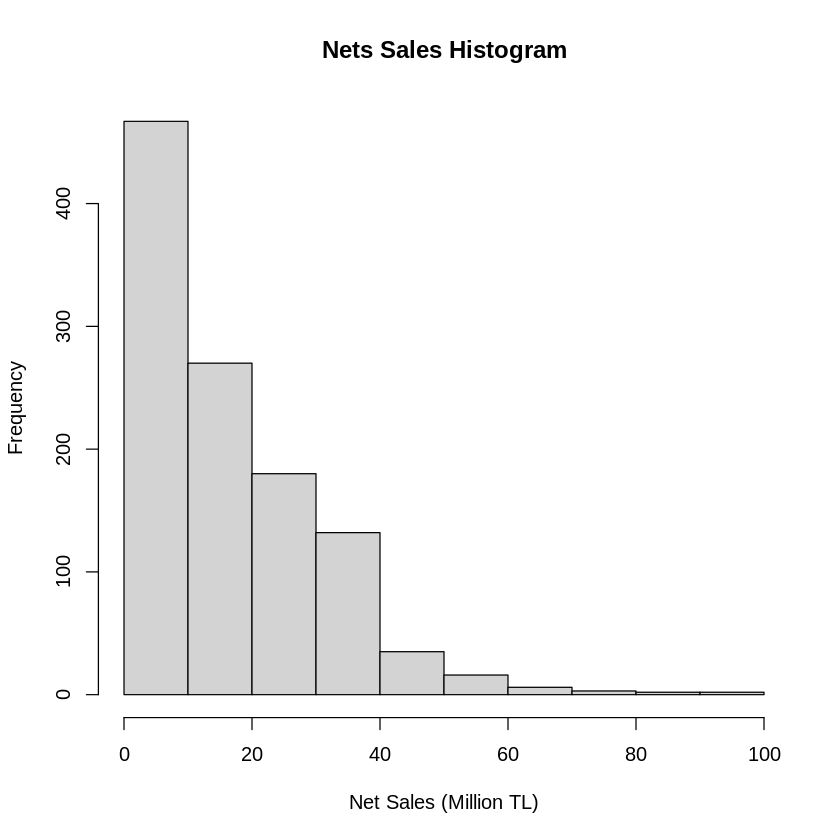

In [ ]:
#We got rid of the NA's and got the summary statistics. Lets visualize some columnns and learn more about the data.

#1) First and most important column, our dependent variable: Net_Sales

hist(startup$Net_Sales/1000000, main="Nets Sales Histogram",xlab="Net Sales (Million TL)")



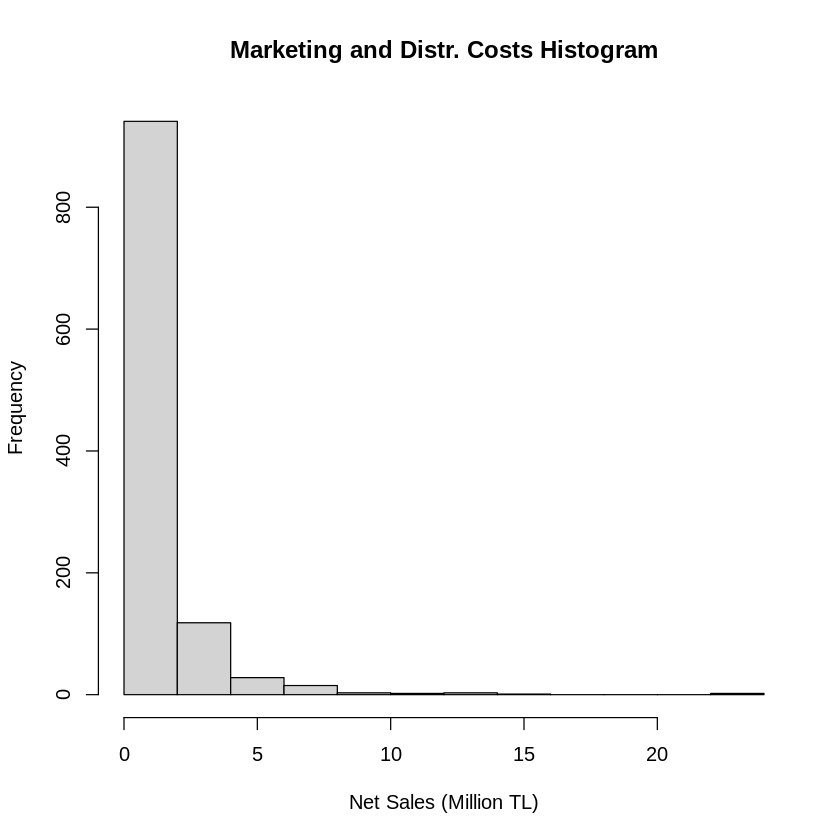

In [ ]:
#2) Lets look at te distribution and marketing costs.
hist(startup$Marketing_Dist_Costs/1000000, main="Marketing and Distr. Costs Histogram",xlab="Net Sales (Million TL)")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



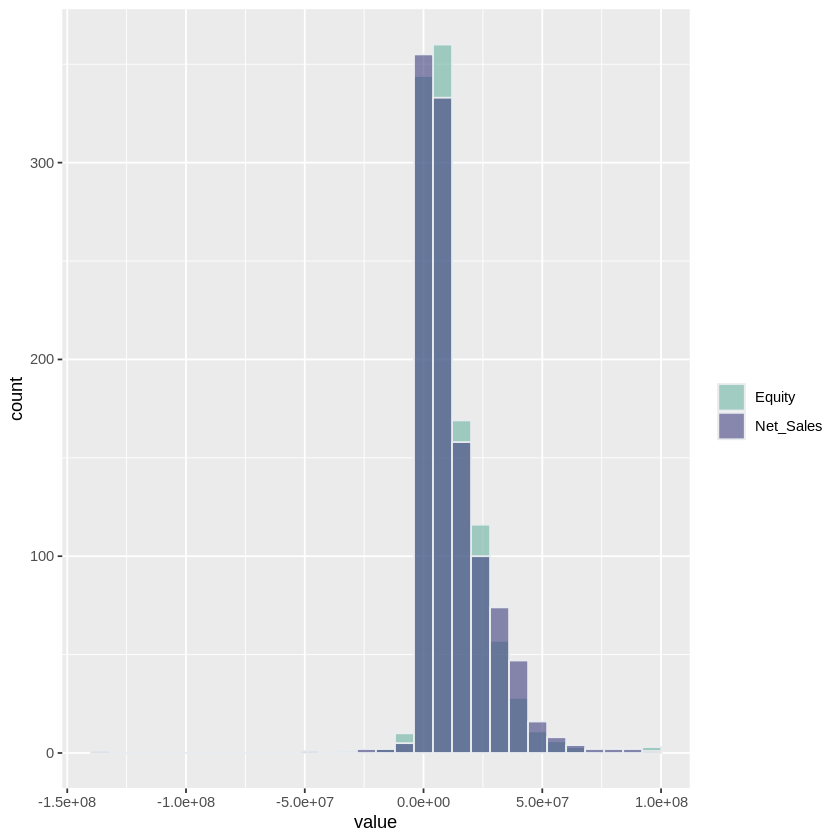

In [ ]:
#3) Now, lets compare distributions of Net_Sales vs Equity
SalEq <- data.frame(
  type = c( "Net_Sales", "Equity"),
  value = c( startup$Net_Sales, startup$Equity )
)

# Represent it
SalEqP <- SalEq %>%
  ggplot( aes(x=value, fill=type)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#69b3a2", "#404080")) +

    labs(fill="")

SalEqP

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



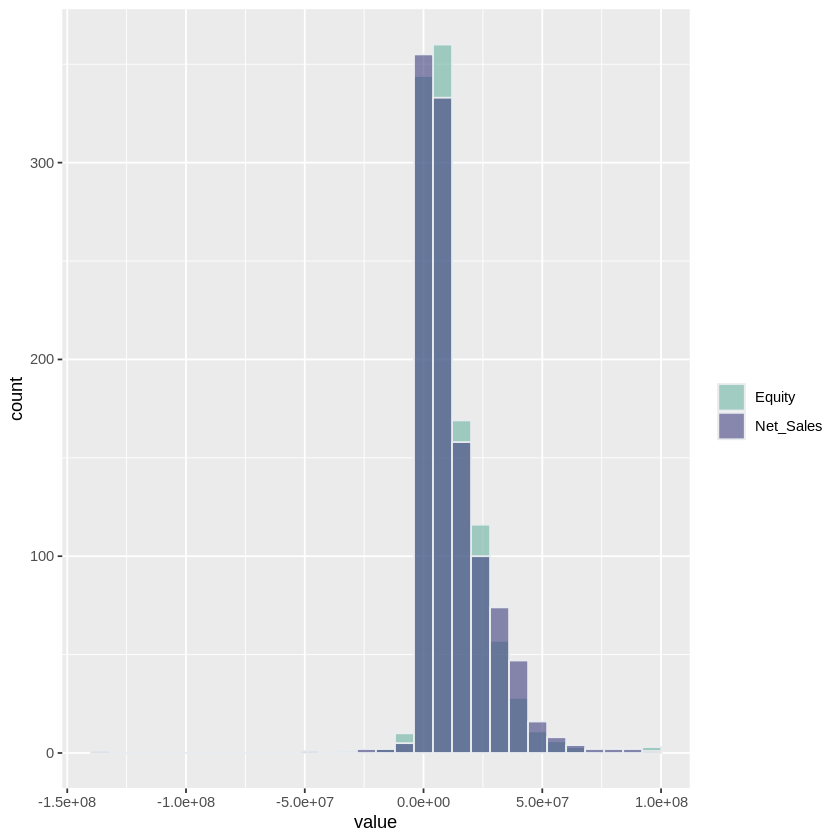

In [ ]:
#4) Lets investigate distribtuion of Net_Sales column vs R&D expenditure.
SalRD <- data.frame(
  type = c( "Net_Sales", "R&D Expenditure"),
  value = c( startup$Net_Sales, startup$R_D_Expenditure )
)

# Represent it
SalRD <- SalEq %>%
  ggplot( aes(x=value, fill=type)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#69b3a2", "#404080")) +

    labs(fill="")

SalRD

It looks like a Net Sales, Equity and R&D Expenditure have similar distributions.

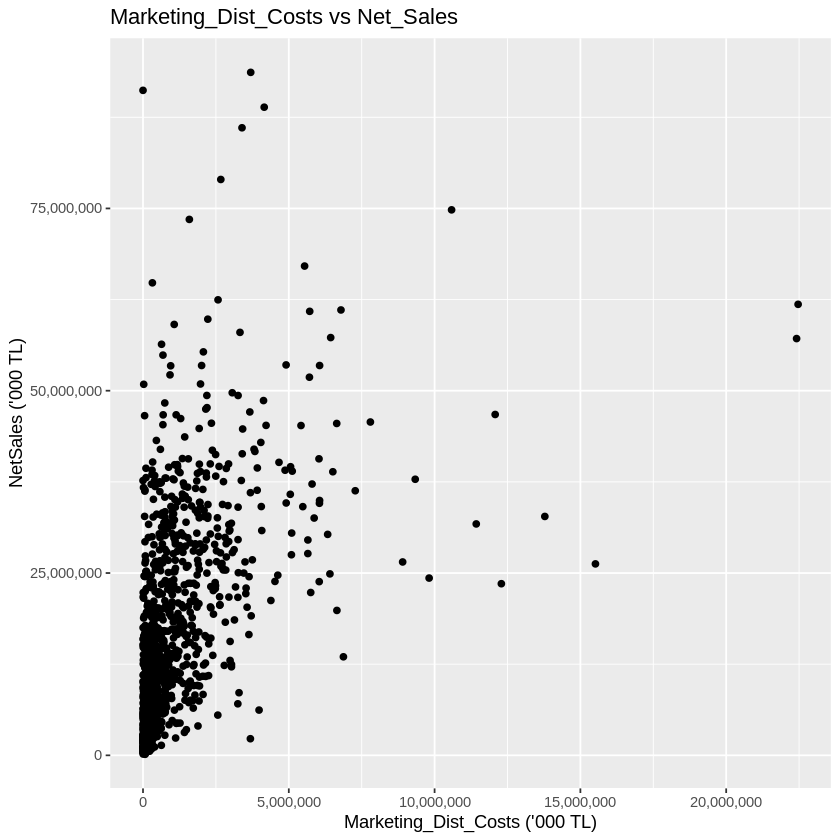

In [ ]:
#5) Lets observe the scatter plot between Marketing and Distribution Costs vs Net Sales.

ggplot(data = startup) + geom_point(aes(x = Marketing_Dist_Costs, y = Net_Sales))+
  ggtitle('Marketing_Dist_Costs vs Net_Sales') +
  scale_x_continuous(name="Marketing_Dist_Costs ('000 TL)", labels = comma) +
  scale_y_continuous(name = "NetSales ('000 TL)", labels = comma)

First of all, the relationship between 'MarketingDistributionExpenses' and 'NetSales' variables is revealed with a scatterplot. It cannot be said that there is a fully linear relationship between the variables. Varying (Heteroscedasticity) structure is observed in the scatterplot. As the 'MarketingSalesDistributionExpenses' variable increases, the variance in the form of an upward cone increases.

In [ ]:
#6) Correlation analysis
corr <- cor.test(startup$Net_Sales, startup$Marketing_Dist_Costs)
corr


	Pearson's product-moment correlation

data:  startup$Net_Sales and startup$Marketing_Dist_Costs
t = 19.71, df = 1111, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4641123 0.5512648
sample estimates:
      cor 
0.5089919 


In [ ]:
#p-value for correlation
corr$p.value

[1] 2.145391e-74

In [ ]:
#Correlation coeffcient
corr$estimate

cor 
0.5089919

According to the results of the correlation analysis, p-value= `r correlation$p.value` and the result suggests that there is a statistically significant correlation between the two variables at the level of $alpha$ = 0.05.

The correlation coefficient is `r correlation $estimate` and this can be interpreted as the marketing, sales and distribution expenditures variable will move positively with the net sales variable.

Significant correlation coefficients between numerical variables are summarized below.

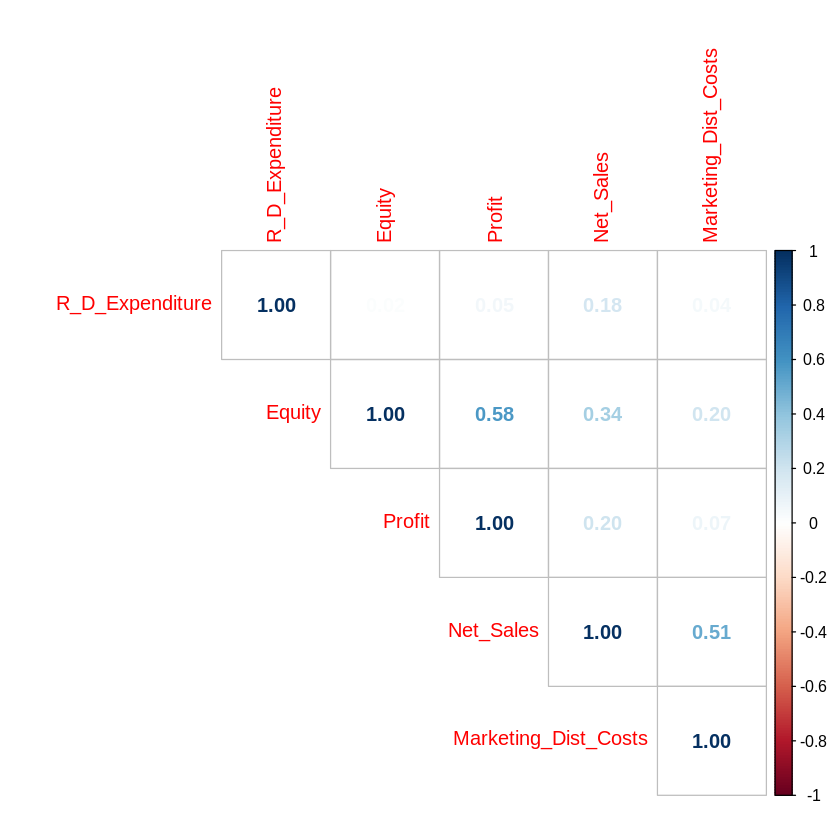

In [ ]:
corrs <- cor(startup_data[,c( "Equity", "Net_Sales", "R_D_Expenditure", "Marketing_Dist_Costs", "Profit")])
p.mat <- cor.mtest(corrs)

corrplot(corrs, type="upper", order="hclust", method="number", sig.level = 0.05)

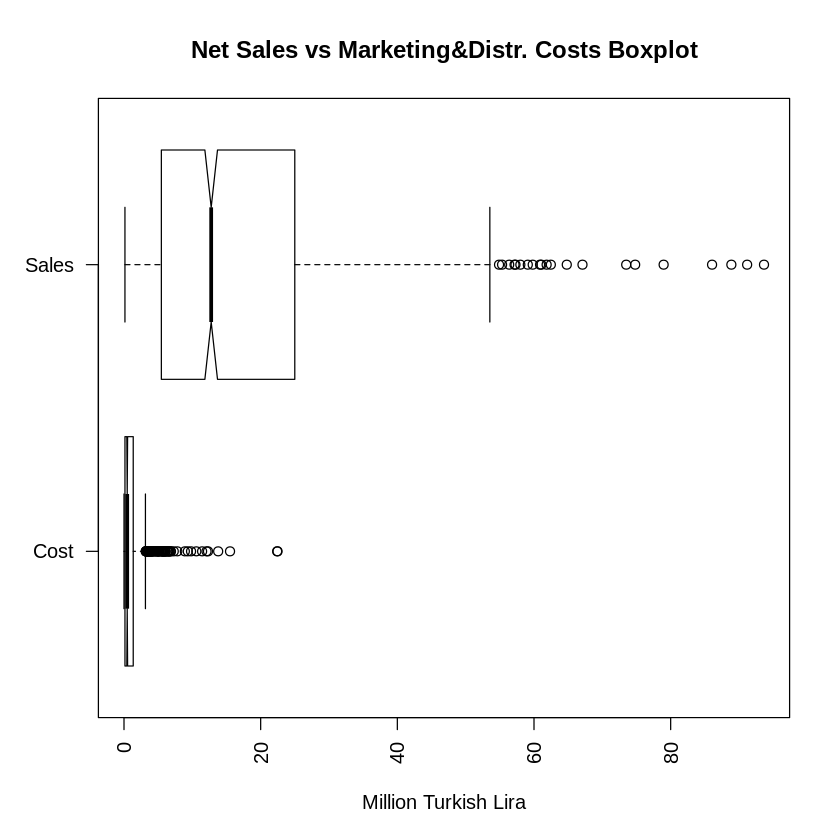

In [ ]:
#7) Now, lets take a look at the boxplot too observe whether there are any outliers.
boxplot(startup$Marketing_Dist_Costs/1000000, startup$Net_Sales/1000000,
data=startup,
main="Net Sales vs Marketing&Distr. Costs Boxplot",
xlab="Million Turkish Lira",
names = c("Cost", "Sales"),
las = 2,
col = c("white", "white"),
border = "black",
horizontal = TRUE,
notch = TRUE
)


When the box-whisker plot is examined, it is clearly seen that there are outliers for both variables.

It should be taken into account in the analyzes that the these outliers observations can significantly affect the mean values.

It can be said that the outliers increase as the amount increases. This situation can be considered as the reason for the changing variance observed in the scatterplot.

In [ ]:
#8) Lets create a simple regression model with one variable, NetSales vs  Marketing and Distribution costs.


$$Y = \alpha + \beta X + \epsilon$$

In [ ]:
lm1 <- lm(Net_Sales ~ Marketing_Dist_Costs, data = startup)
summary(lm1)
kable(coef(lm1), digits = 3, col.names = "Parameters", format.args = list(big.mark = ",", scientific = FALSE))


Call:
lm(formula = Net_Sales ~ Marketing_Dist_Costs, data = startup)

Residuals:
      Min        1Q    Median        3Q       Max 
-47651065  -8738429  -3104165   6055749  78769691 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.242e+07  4.288e+05   28.97   <2e-16 ***
Marketing_Dist_Costs 3.962e+00  2.010e-01   19.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12290000 on 1111 degrees of freedom
Multiple R-squared:  0.2591,	Adjusted R-squared:  0.2584 
F-statistic: 388.5 on 1 and 1111 DF,  p-value: < 2.2e-16




|                     |     Parameters|
|:--------------------|--------------:|
|(Intercept)          | 12,419,923.789|
|Marketing_Dist_Costs |          3.962|

While running the regression model, the 'lm' function, which runs the OLS model, was used because the earlier Box-Whisky and the Scatter plots suggest outliers and varying variances for the variables.

The $R^2$ value of the model is 0.2591, and the model and the dependent variable 'Marketing_Dist_Expenses' can explain 25.91% of the change in the 'Net_Sales' independent variable. A significant part of the change cannot be explained because it remains in the variables within the errors. It is considered that the explanatory value of the model, namely $R^2$, may increase with the variables to be added in future steps.

When the results of the regression analysis are examined, p-value= '2.2e-16' and this value suggests that there is a statistically significant linear relationship between the two variables at the level of $\alpha$ = 0.05, all things being constant. According to the results of the regression analysis, we can write our equation as follows:

$$NetSales = 1.242e*10^7 + 3.962*MarketingDistCosts+ \epsilon $$

This equation can be interpreted as:

Keeping everything else constant, net sales would average around 12.4 million if there were no Marketing Sales Distribution Expenses. In addition, if we keep everything else constant, each thousand TL spent on Marketing Sales Distribution Expenses will increase Net Sales by 3962 TL.


NOTE: Due to the criteria determined when taking samples from the large data set, net sales start from 12.4 million TL. Since the sample data does not represent the population, it has no special meaning.

In [ ]:
#Variance Analysis of Regression Model (ANOVA)
kable(anova(lm1), digits = 0, format.args = list(big.mark = ",", scientific = FALSE))



|                     |    Df|                  Sum Sq|                Mean Sq| F value| Pr(>F)|
|:--------------------|-----:|-----------------------:|----------------------:|-------:|------:|
|Marketing_Dist_Costs |     1|  58,701,684,571,759,904| 58,701,684,571,759,904|     388|      0|
|Residuals            | 1,111| 167,882,136,570,111,072|    151,109,033,816,482|        |       |

Since p-value = 0 from the ANOVA table results, it suggests that we can reject our Ho hypothesis at $\alpha$=0.05 level, that is, MarketingDistributionCosts independent variable is a statistically significant variable to explain NetSales dependent variable.

In addition, when the SS and MS data are examined, it is understood that a significant portion of the squares of the differences observed in the NetSales variable can be explained by the MarketingDistributionCosts variable.

The F-test value, on the other hand, suggests that for every 388 units of model change that can be explained, 1 unit in error cannot be explained.

As a result, ANOVA test suggests that the model is statistically significant at $\alpha$=0.05 confidence level.

`geom_smooth()` using formula 'y ~ x'



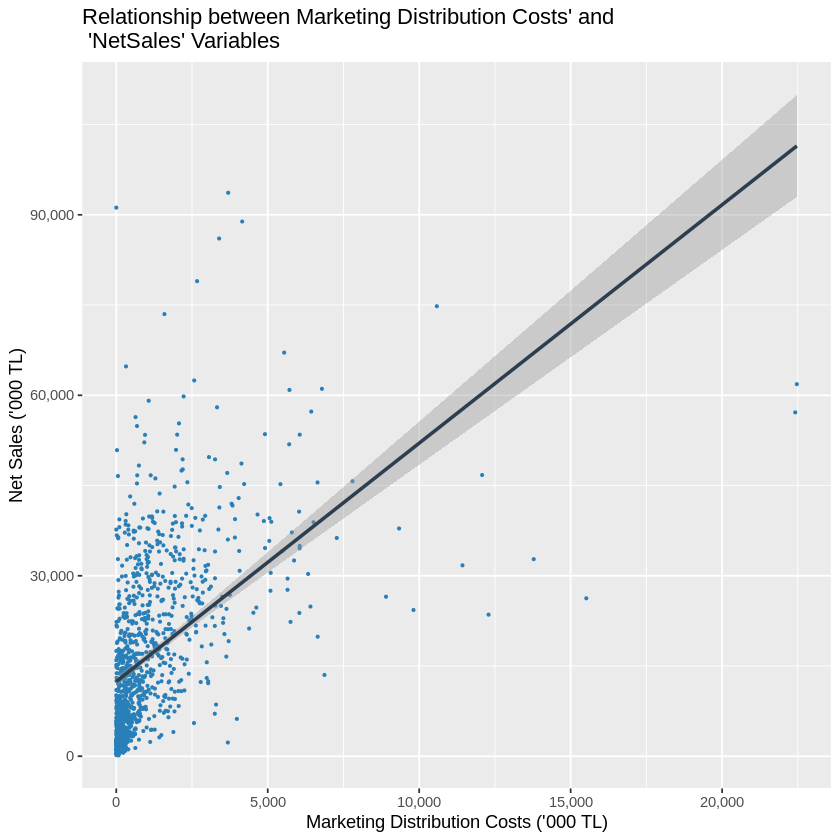

In [ ]:
#Finally, the regression line and confidence intervals will be analyzed by showing them in the scatterplot.
ggplot(startup, aes(x=Marketing_Dist_Costs/1000, y=Net_Sales/1000)) +
  geom_point(color='#2980B9', size = 0.5) +
  geom_smooth(method=lm, color='#2C3E50') +
  ggtitle("Relationship between Marketing Distribution Costs' and \n 'NetSales' Variables") +
  scale_x_continuous(name="Marketing Distribution Costs ('000 TL)", labels = comma) +
  scale_y_continuous(name = "Net Sales ('000 TL)", labels = comma)


Regression analysis results and ANOVA test suggest that the model is significant at $\alpha$=0.05 confidence level.

When we integrate our confidence intervals and regression plot into the scatter plot, it is observed that the confidence interval, that is, the variance, increases for increasing Marketing Distribution Expenses. It is also observed that the model has low variance in a narrow confidence interval for low Marketing Distribution Expenses and Net Sales.

##**Evaluation of Step-1 and Plan for Step-2**

As a result, the linear relationship between the variables 'Marketing_Dist_Costs' and 'NetSales' investigated via sample data set taken from the Entrepreneur Information System were found to be statistically significant at $\alpha$ = 0.05 confidence level.

It is evaluated that outliers and changing variance problems in the data may affect the model and these problems should be resolved in future steps.

The $R^2$ value of the model is 0.2591, and the model and the 'Marketing_Dist_Expenses' dependent variable can explain 25.91% of the change in the 'NetSales' independent variable. A significant part of the change cannot be explained because it remains in the variables within the errors. It is considered that the explanatory value of the model, namely $R^2$, may increase with the variables to be added in future steps.

#**Step-2: Multiple Linear Regression and Residual Analysis**
In the first step, the linear relationship between the variables 'Marketing_Distr_Costs' and 'NetSales' has been examined. In step 2, a new independent variable will be added to the first model created  and residual analyzes of the multiple linear regression model will be performed.

It is aimed that the second independent variable to be added within the scope of step-2 will have the least correlation (multi-collinearity) with the variable 'Marketing_Dist_Costs' so that it does not flaw the model.

First, the relationship between the 'Total_Assets' variable and the 'Marketing_Distr_Costs' scatter plot of the two variables and Pearson's Correlation test will be made.


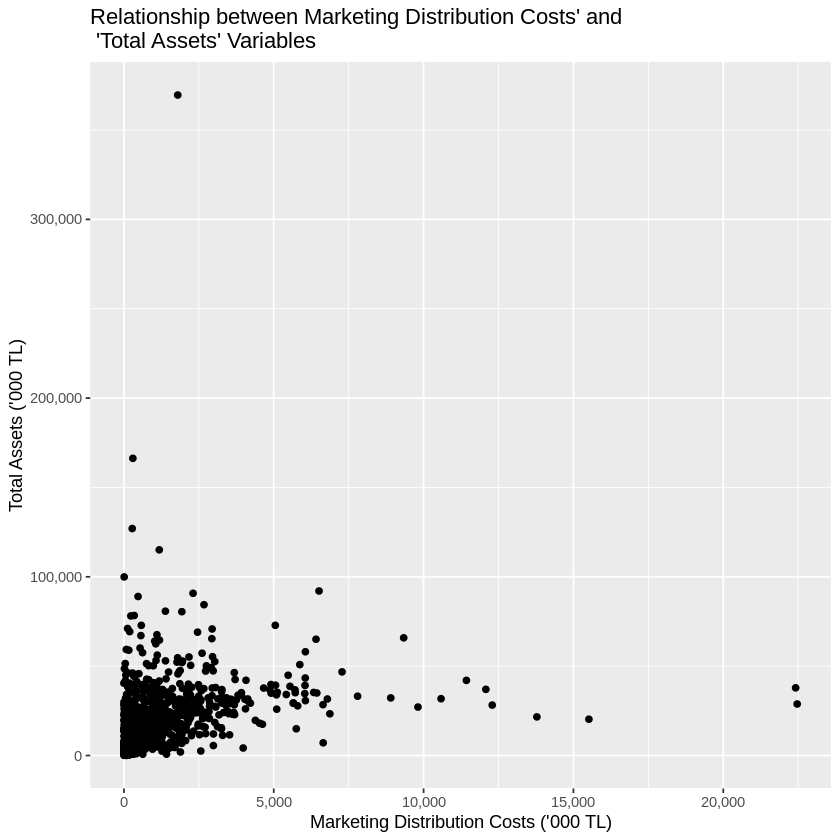

In [ ]:
ggplot(data = startup) + geom_point(aes(x = Marketing_Dist_Costs/1000, y = Total_Assets/1000))+
  ggtitle("Relationship between Marketing Distribution Costs' and \n 'Total Assets' Variables") +
  scale_x_continuous(name="Marketing Distribution Costs ('000 TL)", labels = comma) +
  scale_y_continuous(name = "Total Assets ('000 TL)", labels = comma)


In [ ]:
#p_value for correlation
test <- cor.test(startup$Marketing_Dist_Costs, startup$Total_Assets)
print(test)
test$p.value


	Pearson's product-moment correlation

data:  startup$Marketing_Dist_Costs and startup$Total_Assets
t = 10.402, df = 1111, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2434159 0.3505395
sample estimates:
      cor 
0.2979153 



[1] 3.010841e-24

In [ ]:
#Correlation coefficient
test$estimate

cor 
0.2979153

The relationship between the 'Marketing_Distr_Costs' variable and the 'Total_Assets' variable is intended to have the least correlation. According to the output of the Pearson correlation test, the p-value result suggests that there is **_not_** a statistically significant correlation between the two variables at the level of $\alpha$ = 0.05. The correlation coefficient can be interpreted as that the marketing and distribution costs variable will move positively (not statistically significant) with a weak relationship with the total assets variable.

In [ ]:
#Multiple Linear Regression Model
lm2 <- lm(Net_Sales ~ Marketing_Dist_Costs+Total_Assets, data = startup)
summary(lm2)
kable(coef(lm2), digits = 3, col.names = "Parameters", format.args = list(big.mark = ",", scientific = FALSE))


Call:
lm(formula = Net_Sales ~ Marketing_Dist_Costs + Total_Assets, 
    data = startup)

Residuals:
      Min        1Q    Median        3Q       Max 
-91906164  -6416186  -2578500   4089594  74311253 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.810e+06  4.641e+05   16.83   <2e-16 ***
Marketing_Dist_Costs 2.996e+00  1.869e-01   16.04   <2e-16 ***
Total_Assets         3.039e-01  1.752e-02   17.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10910000 on 1110 degrees of freedom
Multiple R-squared:  0.4171,	Adjusted R-squared:  0.4161 
F-statistic: 397.2 on 2 and 1110 DF,  p-value: < 2.2e-16




|                     |    Parameters|
|:--------------------|-------------:|
|(Intercept)          | 7,809,751.451|
|Marketing_Dist_Costs |         2.996|
|Total_Assets         |         0.304|

The $ Adjusted R^2$ value of the model is 0.4161, which indicates that independent variables 'Marketing_Distr_Costs' and 'Total_Assets' can explain 41.61% of the variation in the model and the dependent variable 'Net_Sales'.

Despite the addition of the second variable, a significant part of the change cannot be explained because it still remains in the variables within the errors. It is still considered that the explanatory value of the model, namely $R^2$, should be increased by adding new variables.

When the results of the regression analysis are examined, the p-value= '2.2e-16' and this value suggests that there is a statistically significant linear relationship between the two independent variables and the dependent variable at the $\alpha$ = 0.05 level, all things remaining constant. According to the results of the regression analysis, we can write our equation as follows:

$$NetSales = 7.81*10^6 + 2.996*Marketing Sales Distribution Expenses + 0.304*total assets + \epsilon $$

This equation can be interpreted as:

Keeping everything else constant, net sales would average around TL 11.9 million if there were no Marketing Distribution Costs and Total Assets. In addition, if we keep everything else constant, each thousand TL spent in Marketing and Distribution Expenses increases Net Sales by 2,996 TL; and each TL increase in Total Assets will increase Net Sales by TL 304.

In [ ]:
#Variance (ANOVA) Analysis of Multiple Linear Regression Model
kable(anova(lm2), digits = 0, format.args = list(big.mark = ",", scientific = FALSE))



|                     |    Df|                  Sum Sq|                Mean Sq| F value| Pr(>F)|
|:--------------------|-----:|-----------------------:|----------------------:|-------:|------:|
|Marketing_Dist_Costs |     1|  58,701,684,571,759,904| 58,701,684,571,759,904|     493|      0|
|Total_Assets         |     1|  35,817,446,776,345,184| 35,817,446,776,345,184|     301|      0|
|Residuals            | 1,110| 132,064,689,793,765,888|    118,977,198,012,402|        |       |

Since p-value = 0 from the ANOVA table results, it suggests that we can reject our Ho hypothesis and accept H1 at $\alpha$=0.05 level, that is, Marketing_Dist_Costs and Top_Assets independent variables are statistically significant variables to explain the Net_Sales dependent variable.

In addition, when the SS and MS data are analyzed, it is understood that a significant part of the squared differences observed in the Net_Sales variable are still unexplained, but 25.9 percent can be explained by the Marketing_Dist_Costs variable and only 15.8 percent by the Total_Assets variable.

The F-test values, on the other hand, suggest that 1 unit in error cannot be explained for every 493 units of model change that can be explained with the variable Marketing_Dist_Costs, and 1 unit in error cannot be explained for every 301 units of model change that can be explained with the variable top_entity.

As a result, ANOVA test suggests that the model is statistically significant at $\alpha$=0.05 confidence level.

In [ ]:
#Calculation of Variance Inflation Factor (VIF) values for Multiple Linear Regression
kable(car::vif(lm2))



|                     |        x|
|:--------------------|--------:|
|Marketing_Dist_Costs | 1.097398|
|Total_Assets         | 1.097398|

When the Variance Inflation Values (VIF) of the Multiple Linear Regression model are calculated, it is seen that result is less than 10 for both variables. In this case, the result can be interpreted as not suggesting the problem of multicollinearity between the variables.

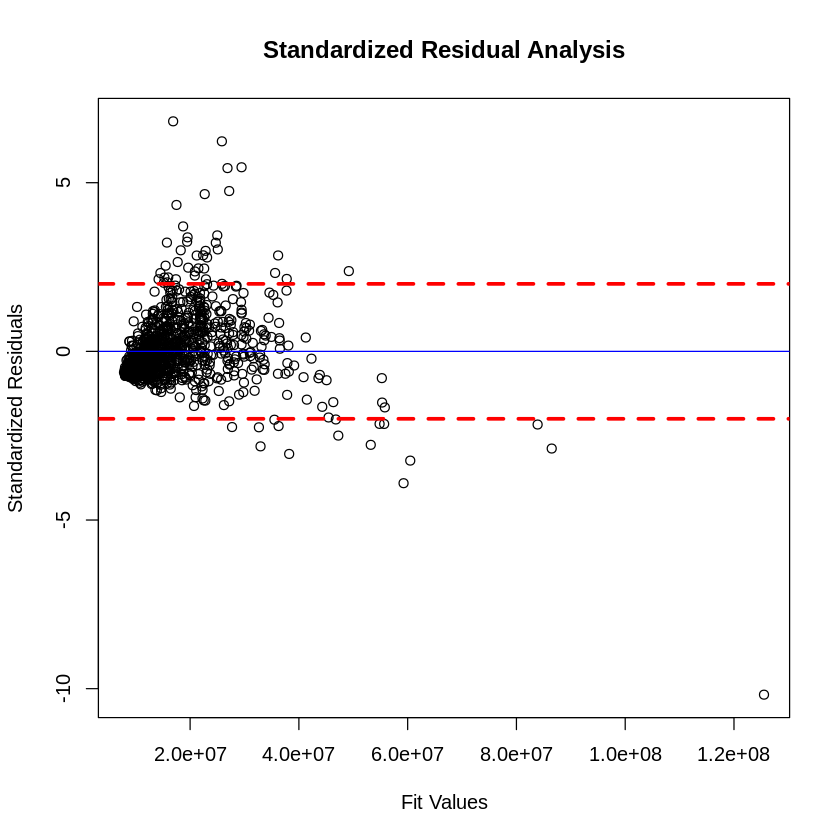

In [ ]:
#Standardized Residual Analysis
lm.stdres = rstandard(lm2)
plot(fitted.values(lm2), lm.stdres,
     ylab="Standardized Residuals",
     xlab="Fit Values",
     main="Standardized Residual Analysis")
abline(h= c(0, 2,-2), col=c("blue", "red", "red"), lty=c(1,2,2), lwd=c(1, 3, 3))

As is known, Standardized Residual ($|d_i|$ ) values are expected to have zero mean and standard variance.

- In the chart of Standardized Residues ($|d_i|$ ) and Fit Values ($\hat{y_i}$ )), the residuals are gathered around the 0 line (blue) for low fit values, and it is observed that they diverge from the 0 line in a cone shape with increasing fit values. This suggests that there is a heteroscedasticity problem in model residuals.

- Residues with $|d_i|$ > 2 (outside the red lines) clearly reveal potential outliers.

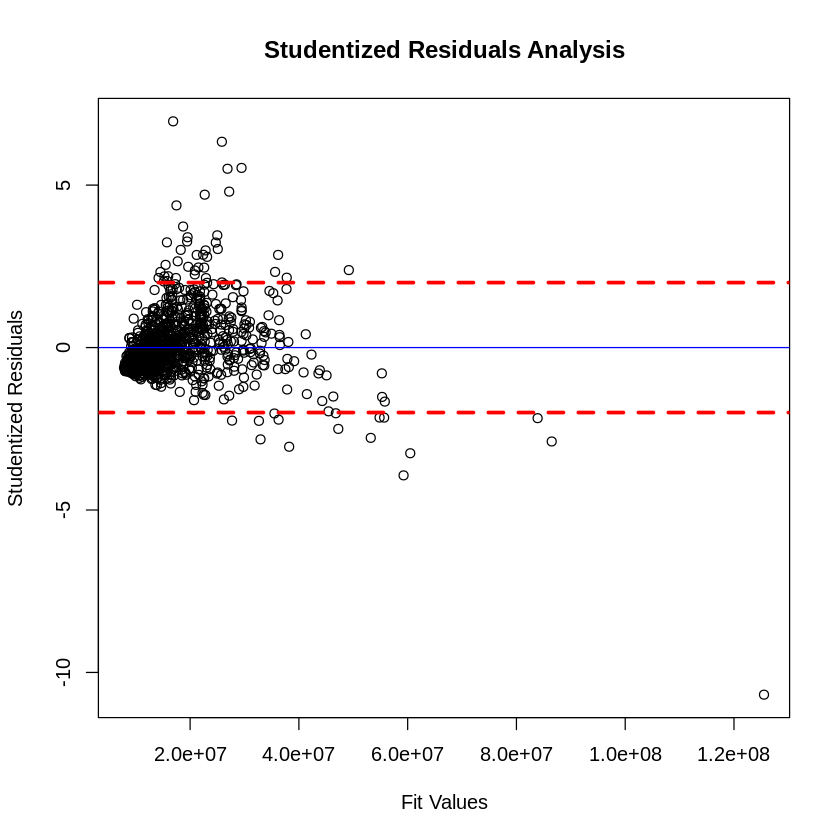

In [ ]:
#Studentized Residuals Analysis
lm.studres = rstudent(lm2)
plot(fitted.values(lm2), lm.studres,
     ylab="Studentized Residuals",
     xlab="Fit Values",
     main="Studentized Residuals Analysis")
abline(h= c(0, 2,-2), col=c("blue", "red", "red"), lty=c(1,2,2), lwd=c(1, 3, 3))

As it is known, the values of Student Type Residuals ($|r_i|$ ) are expected to be higher than the values of Standardized Residuals ($|d_i|$ ).

-However, the model suggests very close almost exactly the same results.

Residues with -$|r_i|$ > 2 (outside the red lines) clearly reveal potential outliers here as well.

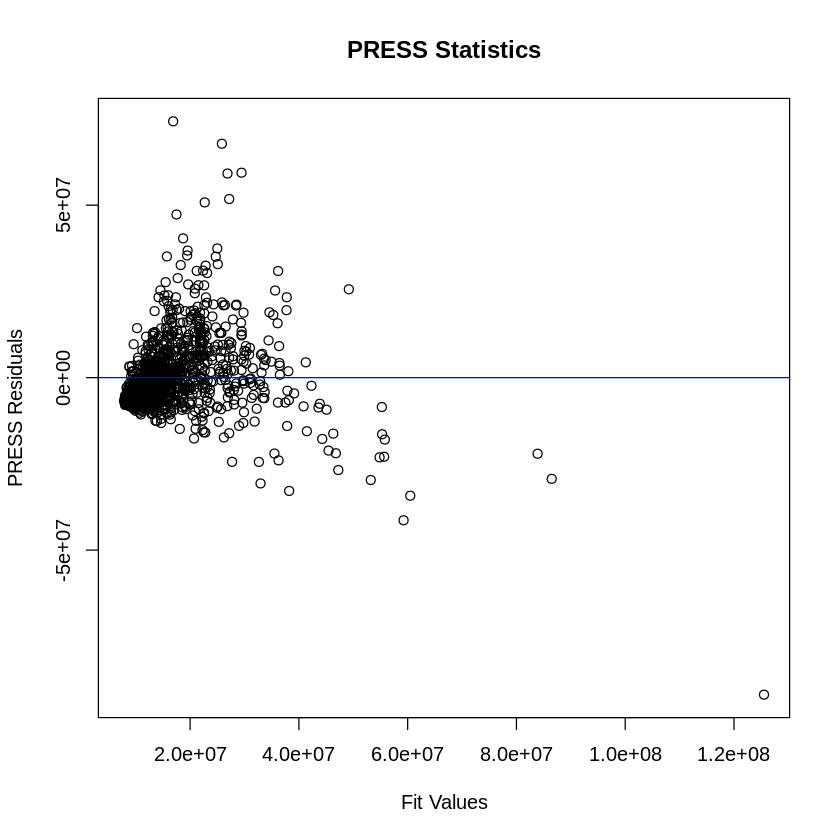

In [ ]:
#PRESS Statistic
lm.PRESS = resid(lm2)
plot(fitted.values(lm2), lm.PRESS,
     ylab="PRESS Residuals",
     xlab="Fit Values",
     main="PRESS Statistics")
abline(h= c(0), col=c("blue"))

The PRESS statistics analysis is also standardized and suggests a similar distribution to Student type residuals. In other words, there is no additional contribution. PRESS statistics will be used to compare different models in the following steps.

In [ ]:
#R-Student Residual Analysis
lm.RStudent = rstudent(lm2)
summary(lm2)


Call:
lm(formula = Net_Sales ~ Marketing_Dist_Costs + Total_Assets, 
    data = startup)

Residuals:
      Min        1Q    Median        3Q       Max 
-91906164  -6416186  -2578500   4089594  74311253 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.810e+06  4.641e+05   16.83   <2e-16 ***
Marketing_Dist_Costs 2.996e+00  1.869e-01   16.04   <2e-16 ***
Total_Assets         3.039e-01  1.752e-02   17.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10910000 on 1110 degrees of freedom
Multiple R-squared:  0.4171,	Adjusted R-squared:  0.4161 
F-statistic: 397.2 on 2 and 1110 DF,  p-value: < 2.2e-16


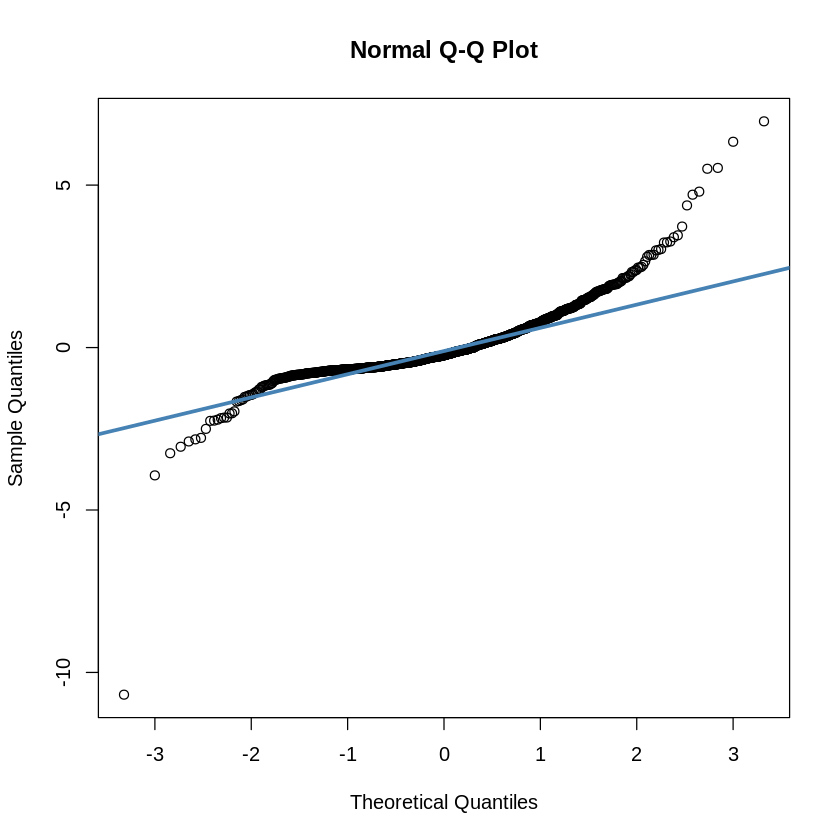

In [ ]:
#Normal Probability Plot
yhat <- lm2$fit
qqnorm(lm.RStudent)
qqline(lm.RStudent, col = "steelblue", lwd = 3)

Normal Q-Q Graph is plotted for Normal Probability analysis with R-Student Residuals. The graph shows an upward and downward curve, although not very sharp at both ends, suggesting that the tails of the distribution are quite light relative to the normal considered.

Since there are deviations in the normality assumption, it is considered that there may be potential risks on the t and F statistics, which are based on the normality assumption, and on the confidence and predictive intervals.

In order to reach a more precise result, a normality test will be performed.

In [ ]:
#Normality test for residuals
shapiro.test(lm2$residuals)

ad.test(lm2$residuals)


	Shapiro-Wilk normality test

data:  lm2$residuals
W = 0.84667, p-value < 2.2e-16



	Anderson-Darling normality test

data:  lm2$residuals
A = 40.648, p-value < 2.2e-16


According to the results of Shapiro-Wilk and Anderson-Darling Normality tests, since the p-value = `2.2*e-16`, it suggests that we can reject our $H_0$ hypothesis, which is the normal distribution of the residuals at the $\alpha$=0.05 level, and accept that the model residuals may not be normal. Therefore, it is clear that improvements in the model need to be continued.

The transformation of our dependent variable 'Net Sales' will be evaluated among possible solutions in the following steps.

Let's look at the R-Student Residulas ($|t_i|$ ) and Fit Values ($\hat{y_i}$ )) Plot

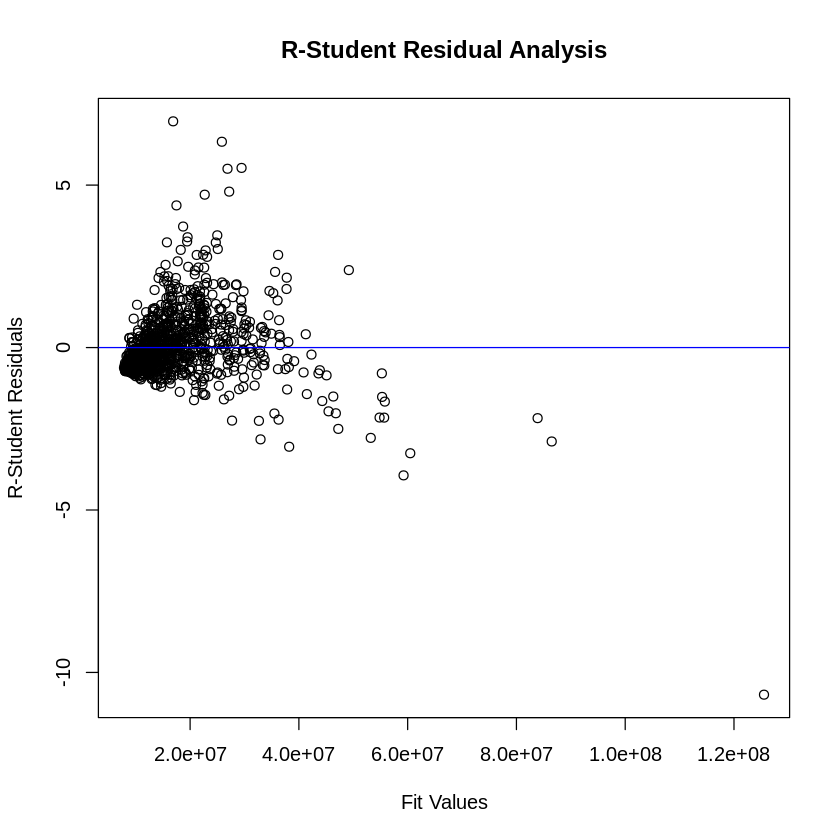

In [ ]:
plot(yhat, lm.RStudent,
     ylab="R-Student Residuals",
     xlab="Fit Values",
     main="R-Student Residual Analysis")
abline(h= c(0), col=c("blue"))

In the graph of R-Student Residuals ($|t_i|$ ) vs. Fit Values ($\hat{y_i}$ )) it is observed that the residuals distribution is gathered around the 0 line (blue) and diverged from the 0 line as a cone with increasing fit values. This suggests that there is a heteroscedasticity problem in the model residuals, that is, there is a model defect. The fact that the funnel shape gives an outward appearance indicates that the variance is an increasing function of y.

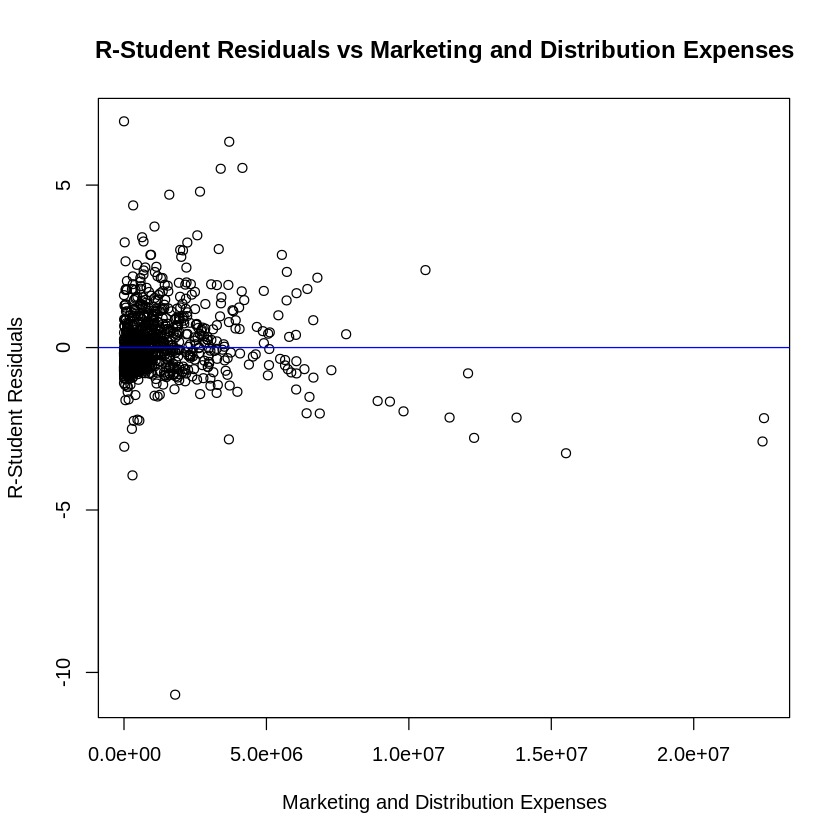

In [ ]:
#R-Student Residuals vs. Marketing and Distribution Expenses Plot
plot(startup$Marketing_Dist_Costs, lm.RStudent,
     ylab="R-Student Residuals",
     xlab="Marketing and Distribution Expenses",
     main="R-Student Residuals vs Marketing and Distribution Expenses")
abline(h= c(0), col=c("blue"))

As well as R-Student Residuals ($|t_i|$ ), the residuals distribution in independent variables plot is expected to be in a horizontal band around the 0 line (blue).

It can be suggested that the R-Student Residuals ($|t_i|$ ) vs. 'Marketing and Distribution Expenses' graph displays a consistent variance fit, with the exception of a few obvious outliers.

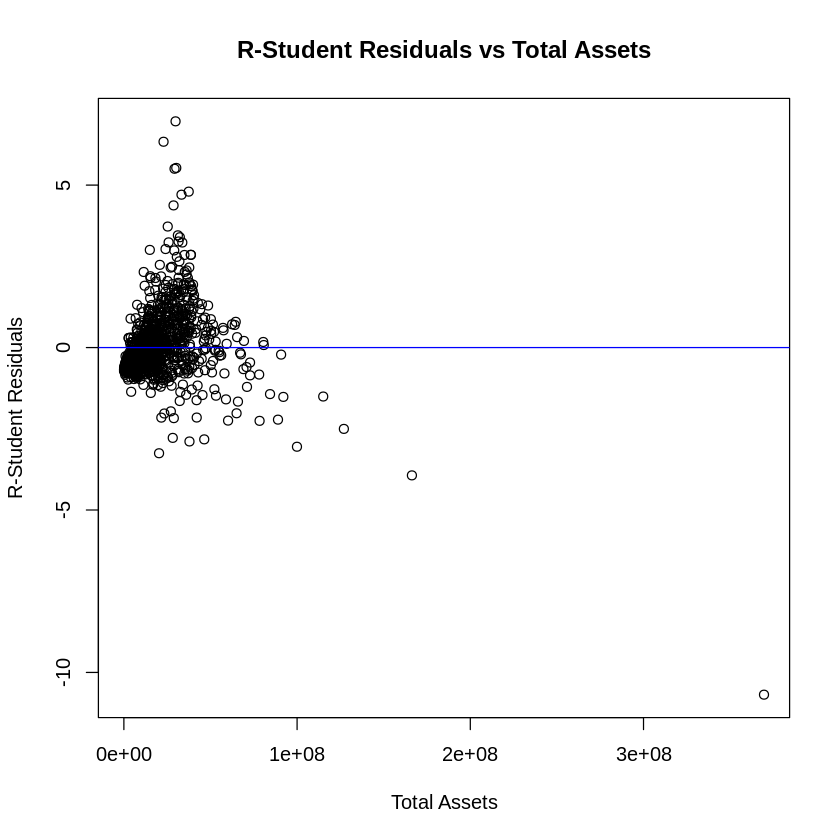

In [ ]:
#R-Student Residuals vs.Total Assets Plot
plot(startup$Total_Assets, lm.RStudent,
     ylab="R-Student Residuals",
     xlab="Total Assets",
     main="R-Student Residuals vs Total Assets")
abline(h= c(0), col=c("blue"))

The expanding funnel shape shown by the R-Student Residuals ($|t_i|$ ) and the 'Total Assets' plot points to the problem of varying variance.

It is known that the plot of R-Student residuals with independent variables that are not in the model is also useful in determining the variables that can potentially be included. Therefore, in this section, the relationship between 'Research Support' and Small Business Support variables, which have the potential to be added to the model, with residuals will be examined.

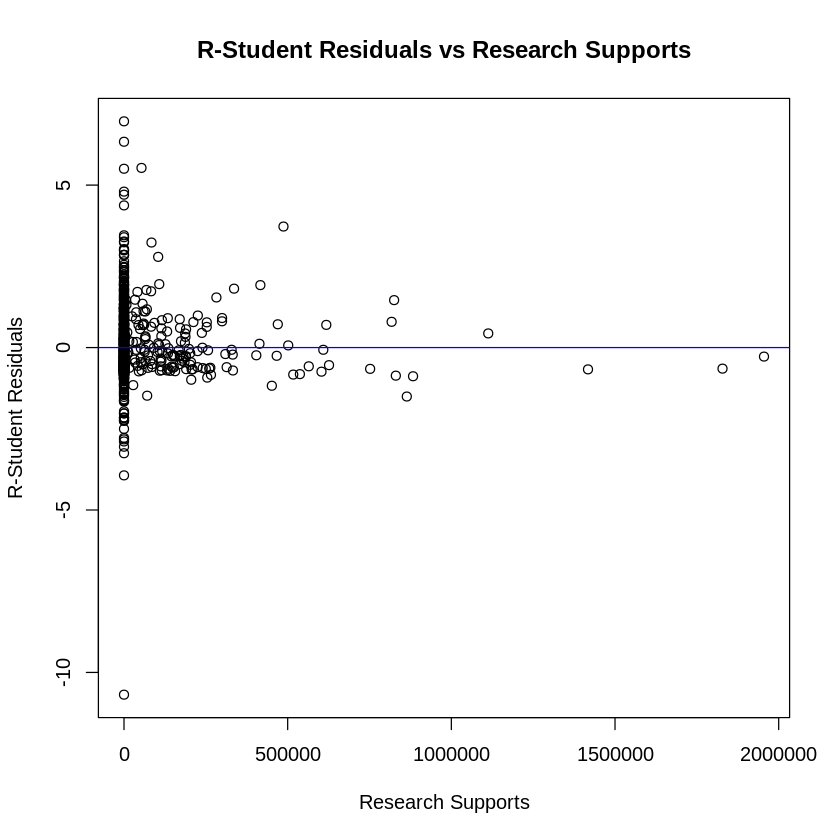

In [ ]:
#R-Student Residuals vs.Research Supports Plot
plot(startup$Research_Support, lm.RStudent,
     ylab="R-Student Residuals",
     xlab="Research Supports",
     main="R-Student Residuals vs Research Supports")
abline(h= c(0), col=c("blue"))

It can be suggested that the graph of the R-Student Residuals ($|t_i|$ ) and the 'Research Supports' displays a consistent view with constant variance, except for a few obvious outliers. In this context, it is thought that it would be appropriate to add this variable to the model by checking its contribution to the model.

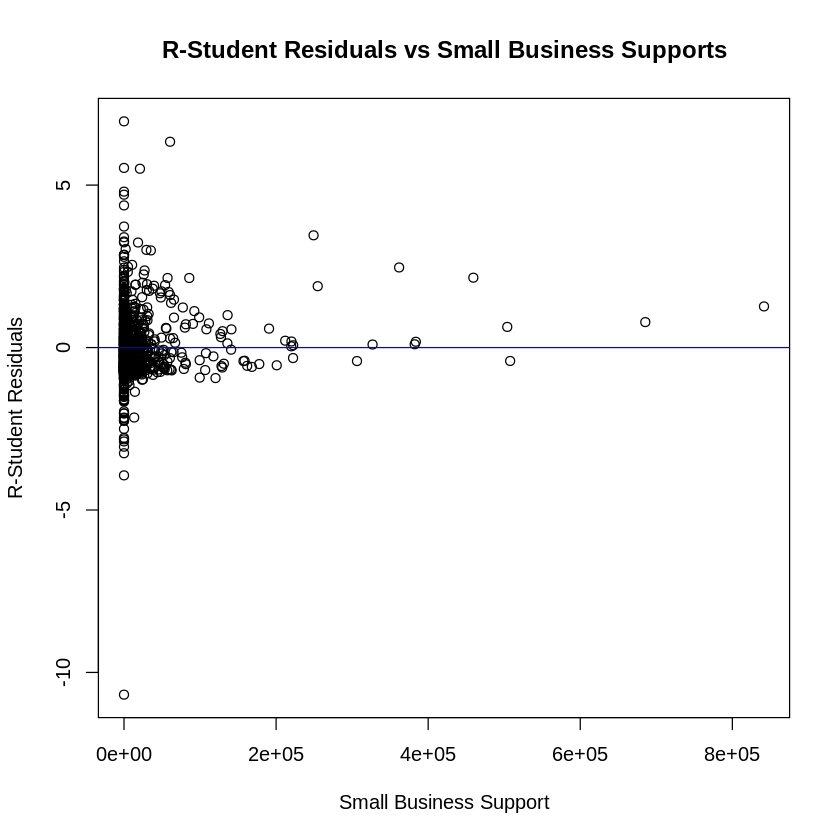

In [ ]:
#R-Student Residuals vs.Small Business Supports Plot
plot(startup$Small_Business_Support, lm.RStudent,
     ylab="R-Student Residuals",
     xlab="Small Business Support",
     main="R-Student Residuals vs Small Business Supports")
abline(h= c(0), col=c("blue"))

It can be suggested that the graph of the R-Student Residuals ($|t_i|$ ) with the 'Small Business Supports' exhibits a consistent display of variance, except for a few obvious outliers. In this context, it is thought that it would be appropriate to add the said variable to the model by checking its contribution to the model.



If we add new observations to the model, the PRESS Statistics is expected to explain the $R^2prediction$ value, which shows the variability in the preliminary prediction. It is also used to compare regression models. In general, a model with a small PRESS statistic is preferred over a larger one.

Previously, we suggested that the variables 'Research Supports' and 'Small Business Supports' could be added to the model. In this section, alternative models that will be created as a result of adding these variables will be compared with each other by using the PRESS statistics.

In [ ]:
#Defining a function to calculate PRESS statistics
PRESS <- function(linear.model) {
    pr <- residuals(linear.model)/(1 - lm.influence(linear.model)$hat)
    sum(pr^2)
}

In [ ]:
#Adding Research Supports to model
model2 <- lm(Net_Sales ~ Marketing_Dist_Costs+Total_Assets+Research_Support, data = startup)
summary(model2)
kable(coef(model2), digits = 3, col.names = "Parameters", format.args = list(big.mark = ",", scientific = FALSE))


Call:
lm(formula = Net_Sales ~ Marketing_Dist_Costs + Total_Assets + 
    Research_Support, data = startup)

Residuals:
      Min        1Q    Median        3Q       Max 
-92122514  -6402665  -2574609   4044251  74260363 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           7.846e+06  4.692e+05  16.720   <2e-16 ***
Marketing_Dist_Costs  2.993e+00  1.870e-01  16.005   <2e-16 ***
Total_Assets          3.044e-01  1.755e-02  17.348   <2e-16 ***
Research_Support     -1.259e+00  2.402e+00  -0.524      0.6    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10910000 on 1109 degrees of freedom
Multiple R-squared:  0.4173,	Adjusted R-squared:  0.4157 
F-statistic: 264.7 on 3 and 1109 DF,  p-value: < 2.2e-16




|                     |    Parameters|
|:--------------------|-------------:|
|(Intercept)          | 7,845,617.772|
|Marketing_Dist_Costs |         2.993|
|Total_Assets         |         0.304|
|Research_Support     |        -1.259|

In [ ]:
#Adding Small Business Supports to model
model3 <- lm(Net_Sales ~ Marketing_Dist_Costs+Total_Assets+Small_Business_Support, data = startup)
summary(model3)
kable(coef(model3), digits = 3, col.names = "Parameters", format.args = list(big.mark = ",", scientific = FALSE))


Call:
lm(formula = Net_Sales ~ Marketing_Dist_Costs + Total_Assets + 
    Small_Business_Support, data = startup)

Residuals:
      Min        1Q    Median        3Q       Max 
-90618076  -6354904  -2590861   4069958  74673889 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.528e+06  4.694e+05  16.037  < 2e-16 ***
Marketing_Dist_Costs   2.996e+00  1.860e-01  16.106  < 2e-16 ***
Total_Assets           3.012e-01  1.746e-02  17.257  < 2e-16 ***
Small_Business_Support 1.985e+01  5.897e+00   3.366 0.000788 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10860000 on 1109 degrees of freedom
Multiple R-squared:  0.423,	Adjusted R-squared:  0.4215 
F-statistic: 271.1 on 3 and 1109 DF,  p-value: < 2.2e-16




|                       |    Parameters|
|:----------------------|-------------:|
|(Intercept)            | 7,528,314.207|
|Marketing_Dist_Costs   |         2.996|
|Total_Assets           |         0.301|
|Small_Business_Support |        19.852|

In [ ]:
#Adding Research and Small Business Supports to model
model4 <- lm(Net_Sales ~ Marketing_Dist_Costs+Total_Assets+Research_Support+Small_Business_Support, data = startup)
summary(model4)
kable(coef(model4), digits = 3, col.names = "Parameters", format.args = list(big.mark = ",", scientific = FALSE))


Call:
lm(formula = Net_Sales ~ Marketing_Dist_Costs + Total_Assets + 
    Research_Support + Small_Business_Support, data = startup)

Residuals:
      Min        1Q    Median        3Q       Max 
-90849807  -6344636  -2546236   4036353  74619514 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             7.567e+06  4.743e+05  15.952  < 2e-16 ***
Marketing_Dist_Costs    2.993e+00  1.862e-01  16.075  < 2e-16 ***
Total_Assets            3.018e-01  1.749e-02  17.257  < 2e-16 ***
Research_Support       -1.365e+00  2.391e+00  -0.571  0.56825    
Small_Business_Support  1.990e+01  5.900e+00   3.373  0.00077 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10860000 on 1108 degrees of freedom
Multiple R-squared:  0.4232,	Adjusted R-squared:  0.4211 
F-statistic: 203.2 on 4 and 1108 DF,  p-value: < 2.2e-16




|                       |    Parameters|
|:----------------------|-------------:|
|(Intercept)            | 7,566,578.558|
|Marketing_Dist_Costs   |         2.993|
|Total_Assets           |         0.302|
|Research_Support       |        -1.365|
|Small_Business_Support |        19.897|

In [ ]:
#Comparison of PRESS statistics
PRESS(lm2)
PRESS(model2)
PRESS(model3)
PRESS(model4)

[1] 1.432812e+17

[1] 1.435258e+17

[1] 1.419011e+17

[1] 1.42136e+17

When the PRESS statistics for different models are compared, it is seen that the smallest PRESS statistics are in Models 3 and 4. In this case, it is considered that Research and Small Business Supports can be added to the model.

In [ ]:
summary(model4)
kable(anova(model4), digits = 2, format.args = list(big.mark = ",", scientific = FALSE))


Call:
lm(formula = Net_Sales ~ Marketing_Dist_Costs + Total_Assets + 
    Research_Support + Small_Business_Support, data = startup)

Residuals:
      Min        1Q    Median        3Q       Max 
-90849807  -6344636  -2546236   4036353  74619514 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             7.567e+06  4.743e+05  15.952  < 2e-16 ***
Marketing_Dist_Costs    2.993e+00  1.862e-01  16.075  < 2e-16 ***
Total_Assets            3.018e-01  1.749e-02  17.257  < 2e-16 ***
Research_Support       -1.365e+00  2.391e+00  -0.571  0.56825    
Small_Business_Support  1.990e+01  5.900e+00   3.373  0.00077 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10860000 on 1108 degrees of freedom
Multiple R-squared:  0.4232,	Adjusted R-squared:  0.4211 
F-statistic: 203.2 on 4 and 1108 DF,  p-value: < 2.2e-16




|                       |    Df|                  Sum Sq|                Mean Sq| F value| Pr(>F)|
|:----------------------|-----:|-----------------------:|----------------------:|-------:|------:|
|Marketing_Dist_Costs   |     1|  58,701,684,571,759,904| 58,701,684,571,759,904|  497.68|    0.0|
|Total_Assets           |     1|  35,817,446,776,345,184| 35,817,446,776,345,184|  303.66|    0.0|
|Research_Support       |     1|      32,686,483,897,628|     32,686,483,897,628|    0.28|    0.6|
|Small_Business_Support |     1|   1,341,614,830,045,835|  1,341,614,830,045,835|   11.37|    0.0|
|Residuals              | 1,108| 130,690,388,479,822,432|    117,951,614,151,464|        |       |

Since $p-value = 2.2*e-16$ of the new model created with Model 4, it suggests that we can reject our $H_0$ hypothesis at $\alpha$=0.05 level, that is, it is a statistically significant model to explain the Net_Sales dependent variable.

Also, if the new model is $Adjusted R^2$ = 0.4211, the explanatory value of the model will increase to $66.18.

While the newly added independent variable 'Small_Business_Support' is also statistically significant, the p-value of 'Research_Support' (0.5683) shows that this parameter is not statistically significant at $\alpha$=0.05 when everything else is kept constant. Therefore, it will not be possible to comment on the change in our dependent variable over the regression parameter of this variable.

###Normal Probability Graph

A Normal Q-Q Graph was drawn for the Normal Probability analysis with R-Student residuals for the new model. Although there are improvements in the graph, it still shows an upward and downward curve, albeit not very sharp, at both ends, suggesting that the tails of the distribution are quite light compared to the assumed normal.

Since deviations in the normality assumption still exist, it is considered that there may be potential risks on the t and F statistics based on the normality assumption, as well as on the confidence and prediction intervals.

In order to reach a more precise result, this model will also be tested for normality.

In [ ]:
#Normality test for residuals
shapiro.test(model4$residuals)

ad.test(model4$residuals)


	Shapiro-Wilk normality test

data:  model4$residuals
W = 0.84637, p-value < 2.2e-16



	Anderson-Darling normality test

data:  model4$residuals
A = 40.634, p-value < 2.2e-16


The p-value for the Shapiro-Wilk and the Anderson-Darling normality tests are less than 2.2e-26, and we can reject our $H_0$ hypothesis, which is the normal distribution of the residuals at the $\alpha$=0.05 level. In other words, rejection of null hypothesis suggests that residuals are may not be normally distributed. Therefore, it is clear that improvements in the model need to be continued.

##**Evaluation of Step-2 and Plan for Step-3**

Normality tests and residual analyzes reveal that improvements should be made on the model because basic assumptions such as constant variance and normal distribution of residuals cannot be met.

Model interventions such as transforming our dependent variable and/or removing effective observations from the sample will be evaluated in order to deal with variance inequalities and normality problems in the following step.

#**Step-3: Variance-Stabilizing Transformations, Functional Relations, Effect of Lost Observations, Adding Dummy Variables**

Normality tests and residual analyzes in step 2 revealed that model deficiencies need to be corrected because basic assumptions such as constant variance and normal distribution of residuals cannot be met.

First of all, variance stabilizing transformations will be tried for the variables selected in step 3. Alternative relations between the variables will be tested on the possibility that the relationship between the variables 'Marketing_Dist_Expenses','Total Asset' and 'Net_Sales' is functional.

However, when compared to Step 2, the most important issue is the lost observations. While the model fits the normal distribution, only 84 out of 1113 observations remain in the model, since the number of enterprises benefiting from both Research and Small Business supports is very small.

Continuing to work in this way may pose a risk in terms of the model reliability because while the goal is learning the effects of each infividual parameter on the Net Sales of the enterprises, it is only possible to make inferences about the change in the Net Sales fore enterprises benefiting from **both Research and Small Business supports.**

On the other hand, similar transformations were tried to be applied for enterprises that received only Small Business or only Research supports, but the assumption of normal distribution of residuals could not be achieved.This suggests that our current research question may not be suitable for analysis with linear programming.

For this reason, within the scope of Step 3, the effects on net sales of enterprises benefiting from both Research and Small Business supports as well as having an R&D Center will be investigated.

First of all, summary statistics on selected observations are given as follows:

In [ ]:
startup_rev <- startup %>%
  filter(Research_Support > 0, Small_Business_Support >0)


options(knitr.kable.NA = "")
kable(summary(startup_rev))



|   | Total_Assets    |    Equity       |  Net_Sales      |R_D_Expenditure  |Marketing_Dist_Costs |    Profit       |    Size         |Small_Business_Support |Research_Support |  R_D_Center   |Design_Center  |
|:--|:----------------|:----------------|:----------------|:----------------|:--------------------|:----------------|:----------------|:----------------------|:----------------|:--------------|:--------------|
|   |Min.   : 1157218 |Min.   :-7768793 |Min.   :  830258 |Min.   :     120 |Min.   :   6460      |Min.   :-7358521 |Length:84        |Min.   :  1436         |Min.   :   3508  |Min.   :0.0000 |Min.   :0.0000 |
|   |1st Qu.: 7195818 |1st Qu.: 2993226 |1st Qu.: 6348182 |1st Qu.:   53752 |1st Qu.: 183954      |1st Qu.:  161678 |Class :character |1st Qu.:  7941         |1st Qu.:  64537  |1st Qu.:0.0000 |1st Qu.:0.0000 |
|   |Median :15975940 |Median : 5934595 |Median :15054876 |Median :  303782 |Median : 532636      |Median :  531230 |Mode  :character |Median : 17488         

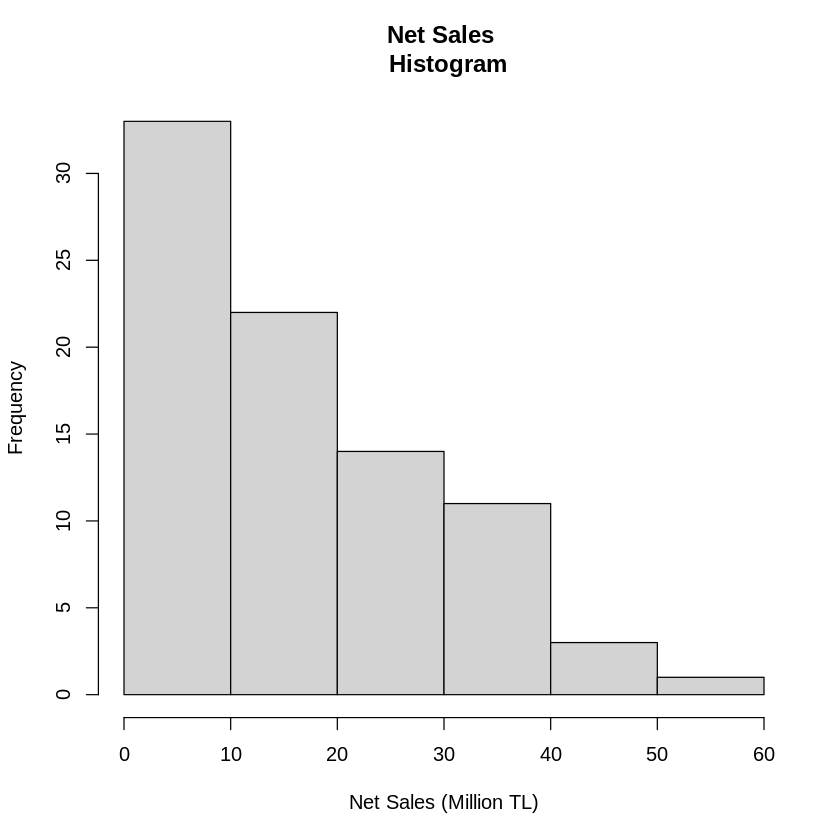

In [ ]:
#Histograms
hist(startup_rev$Net_Sales/1000000, main="Net Sales \n Histogram",xlab="Net Sales (Million TL)")

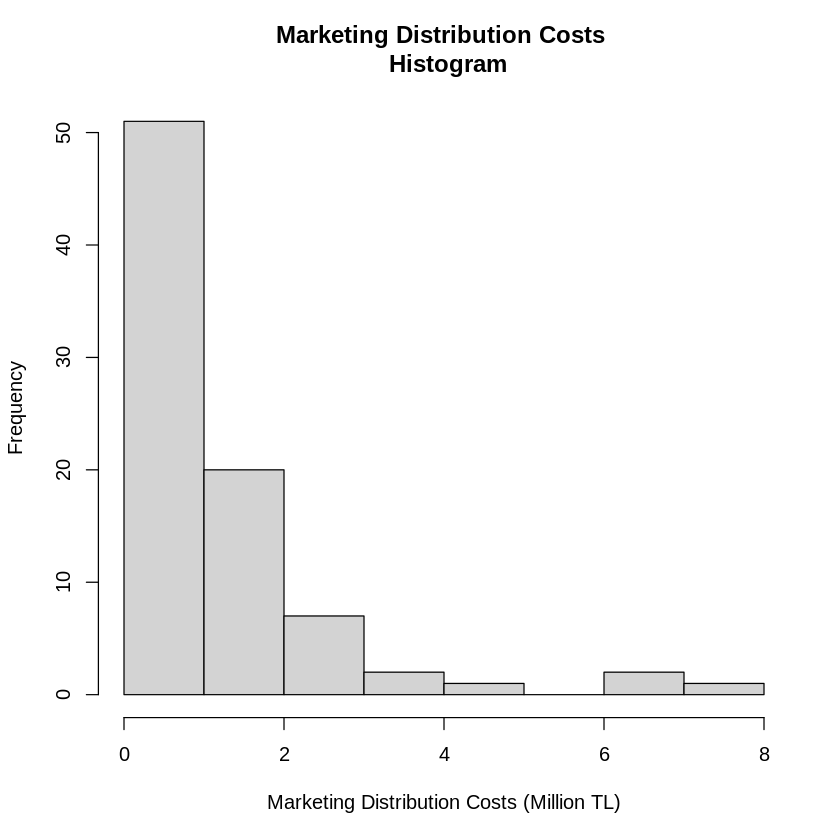

In [ ]:
hist(startup_rev$Marketing_Dist_Costs/1000000, main="Marketing Distribution Costs \n Histogram",xlab="Marketing Distribution Costs (Million TL)")

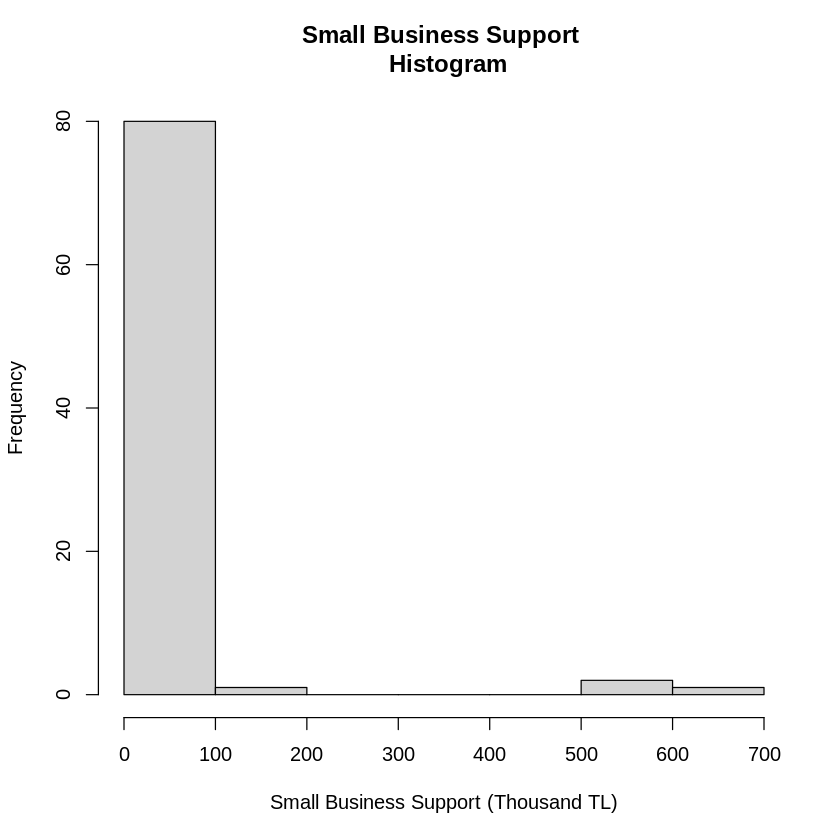

In [ ]:
hist(startup_rev$Small_Business_Support/1000, main="Small Business Support \n Histogram",xlab="Small Business Support (Thousand TL)")

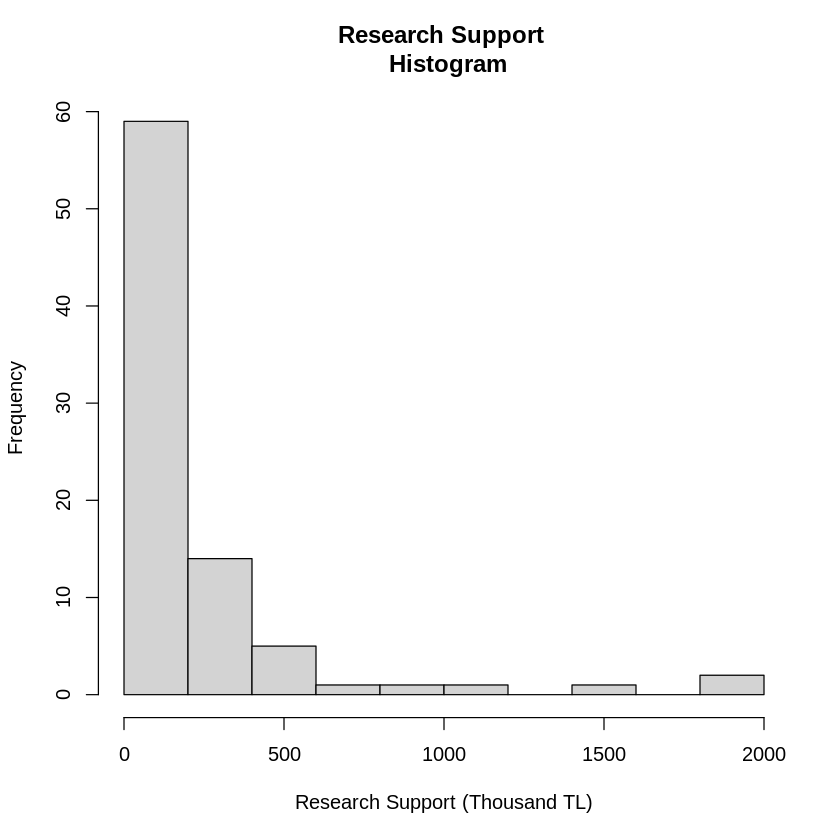

In [ ]:
hist(startup_rev$Research_Support/1000, main="Research Support \n Histogram",xlab="Research Support (Thousand TL)")

As can be clearly seen from the 4 histogram graphs above, the variables have right-skewed (left-stacked) distributions.

In [ ]:
#Scatter Plots

First of all, the relationship between 'Marketing Distribution Costs' and 'Net Sales' variables is revealed with a scatterplot. It cannot be said that there is a fully linear relationship between the variables. Varying (Heteroscedasticity) structure is observed in the scatterplot. As the 'Marketing Distribution Costs' variable increases, the variance in the form of an upward cone increases.

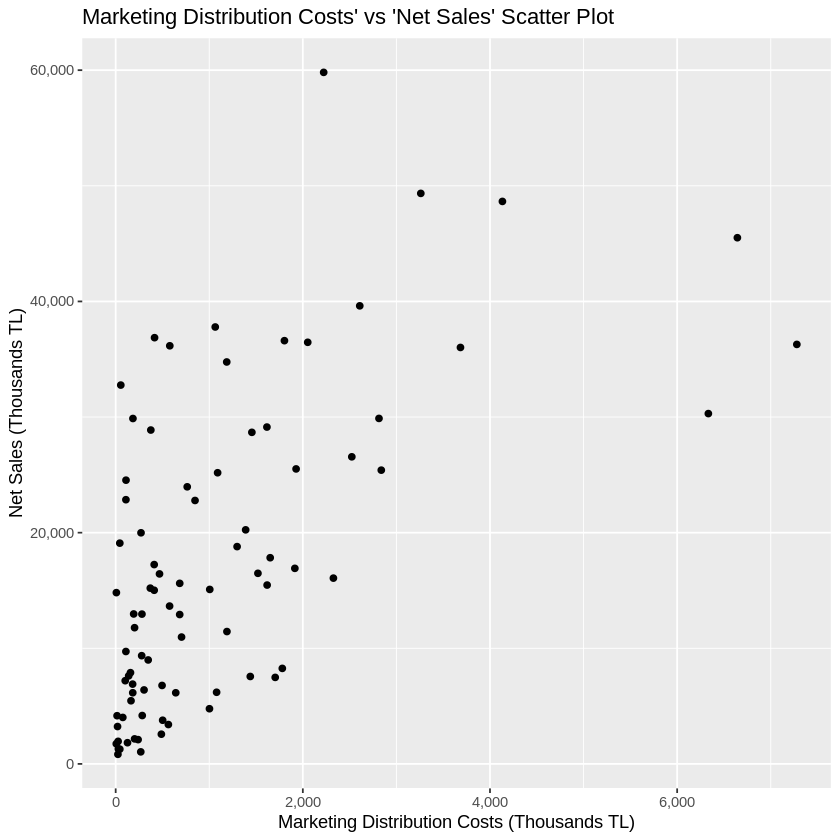

In [ ]:
ggplot(data = startup_rev) + geom_point(aes(x = Marketing_Dist_Costs/1000, y = Net_Sales/1000))+
  ggtitle("Marketing Distribution Costs' vs 'Net Sales' Scatter Plot") +
  scale_x_continuous(name="Marketing Distribution Costs (Thousands TL)", labels = comma) +
  scale_y_continuous(name = "Net Sales (Thousands TL)", labels = comma)

Secondly, the relationship between the 'Total Assets' and 'Net Sales' variables is demonstrated with a scatterplot. It cannot be said that there is a fully linear relationship between the variables. Varying (Heteroscedasticity) structure is observed in the scatterplot. As the 'Total Asset' variable increases, the variance increases in an upward cone shape.

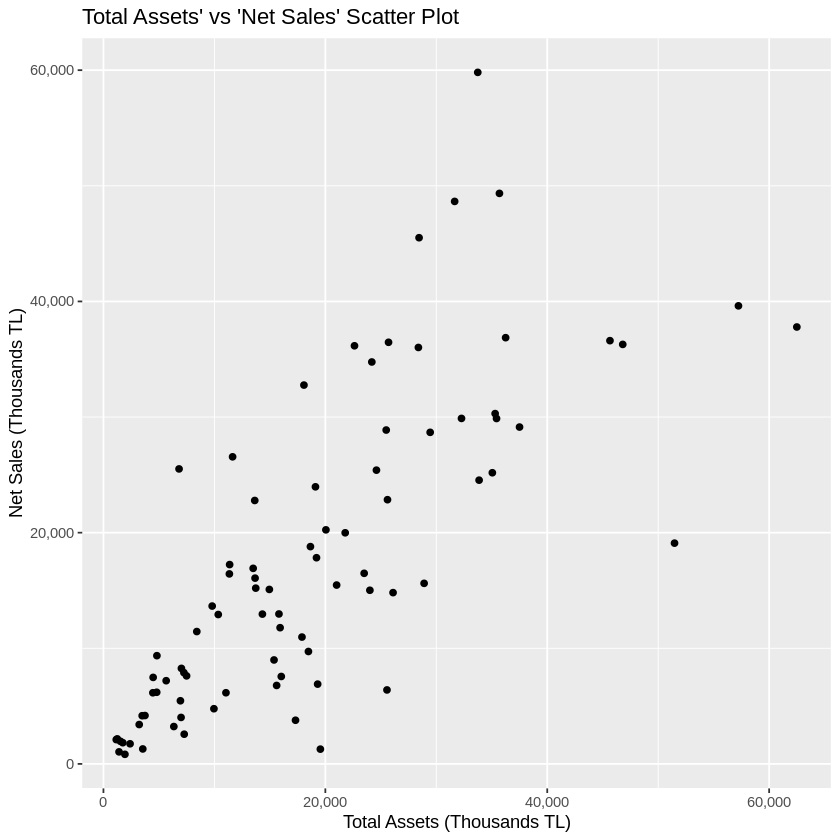

In [ ]:
ggplot(data = startup_rev) + geom_point(aes(x = Total_Assets/1000, y = Net_Sales/1000))+
  ggtitle("Total Assets' vs 'Net Sales' Scatter Plot") +
  scale_x_continuous(name="Total Assets (Thousands TL)", labels = comma) +
  scale_y_continuous(name = "Net Sales (Thousands TL)", labels = comma)

Thirdly, the relationship between 'Small Business Supports' and 'Net Sales' variables is revealed with a scatterplot. It cannot be said that there is a linear relationship between the variables.

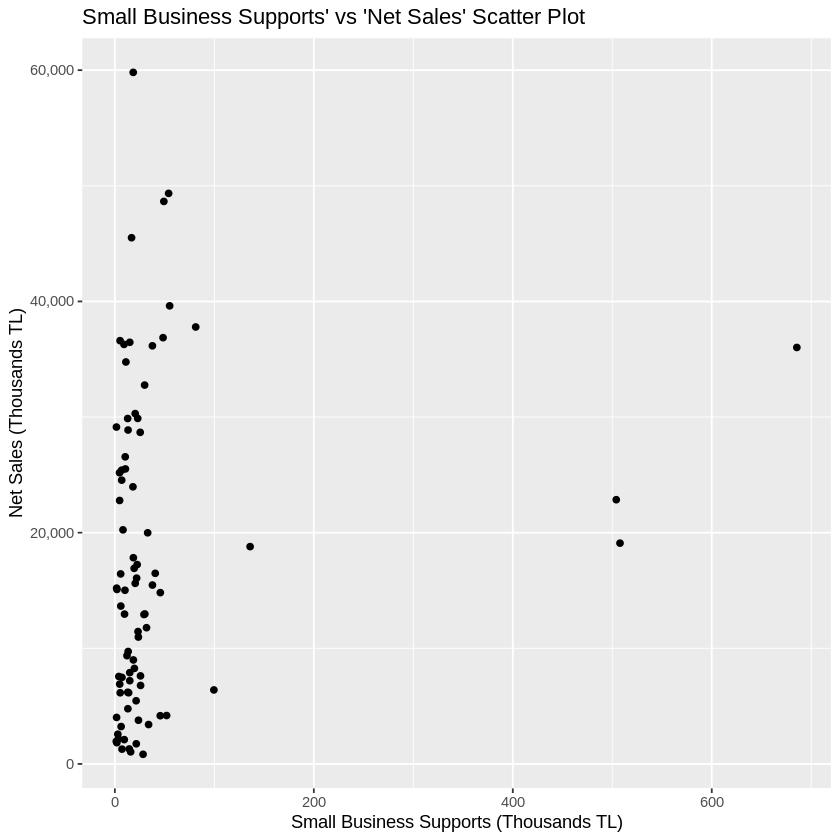

In [ ]:
ggplot(data = startup_rev) + geom_point(aes(x = Small_Business_Support/1000, y = Net_Sales/1000))+
  ggtitle("Small Business Supports' vs 'Net Sales' Scatter Plot") +
  scale_x_continuous(name="Small Business Supports (Thousands TL)", labels = comma) +
  scale_y_continuous(name = "Net Sales (Thousands TL)", labels = comma)

Finally, the relationship between 'Research Supports' and 'Net Sales' variables is revealed with a scatterplot. In this graph, it cannot be said that there is a linear relationship between the variables.

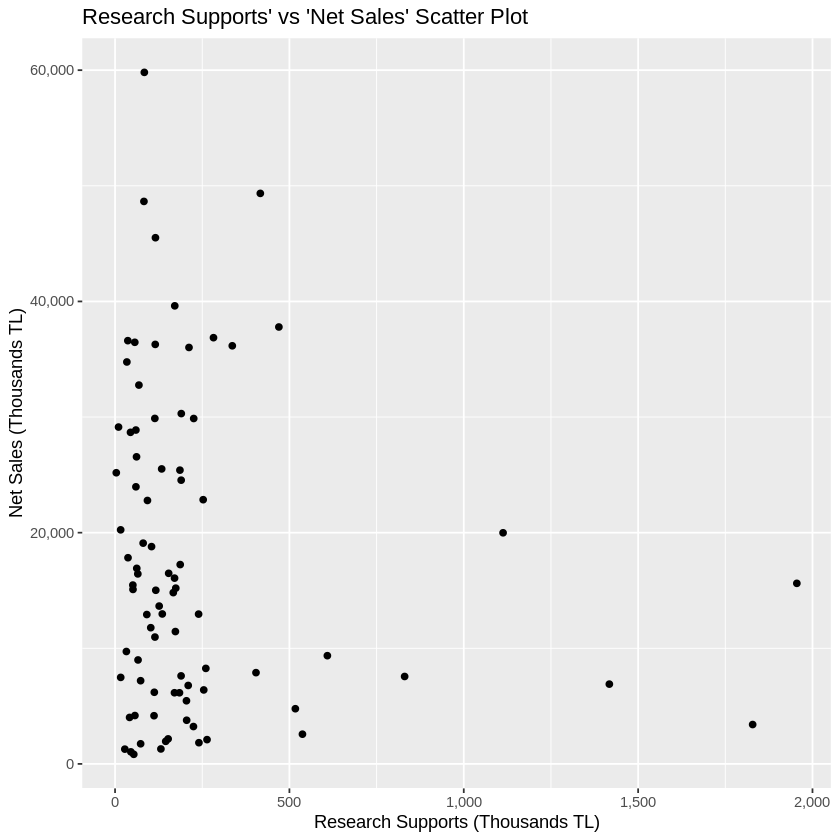

In [ ]:
ggplot(data = startup_rev) + geom_point(aes(x = Research_Support/1000, y = Net_Sales/1000))+
  ggtitle("Research Supports' vs 'Net Sales' Scatter Plot") +
  scale_x_continuous(name="Research Supports (Thousands TL)", labels = comma) +
  scale_y_continuous(name = "Net Sales (Thousands TL)", labels = comma)

###**Variance-Stabilizing Transformations**

Secondly, within the scope of Step 3, the functional relationships will be checked on the model created in Step 2, in which the dependent variable 'Net Sales' is tried to be explained with the dependent variables 'Marketing Distribution Costs', 'Total Assets', 'Small Business Support' and 'Research Support'.

In [ ]:
#Taking logs of all variables
lny <- log(startup_rev$Net_Sales)
lnx1 <- log(startup_rev$Marketing_Dist_Costs)
lnx2 <- log(startup_rev$Total_Assets)
lnx3 <- log(startup_rev$Small_Business_Support)
lnx4 <- log(startup_rev$Research_Support)
model5 <- lm(lny ~ lnx1+lnx2+lnx3+lnx4, data = startup_rev)
summary(model5)
kable(coef(model5), digits = 3, col.names = "Parametreler", format.args = list(big.mark = ",", scientific = FALSE))


Call:
lm(formula = lny ~ lnx1 + lnx2 + lnx3 + lnx4, data = startup_rev)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0368 -0.1957  0.0022  0.3455  1.1865 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.91602    1.18879   1.612    0.111    
lnx1         0.20610    0.04071   5.063 2.63e-06 ***
lnx2         0.71310    0.07089  10.059 8.49e-16 ***
lnx3         0.04995    0.05171   0.966    0.337    
lnx4        -0.04284    0.05358  -0.800    0.426    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5112 on 79 degrees of freedom
Multiple R-squared:  0.762,	Adjusted R-squared:   0.75 
F-statistic: 63.25 on 4 and 79 DF,  p-value: < 2.2e-16




|            | Parametreler|
|:-----------|------------:|
|(Intercept) |        1.916|
|lnx1        |        0.206|
|lnx2        |        0.713|
|lnx3        |        0.050|
|lnx4        |       -0.043|

In [ ]:
#Normality test for Model 5 residuals
shapiro.test(model5$residuals)

ad.test(model5 $residuals)


	Shapiro-Wilk normality test

data:  model5$residuals
W = 0.94368, p-value = 0.001111



	Anderson-Darling normality test

data:  model5$residuals
A = 1.0612, p-value = 0.008233


Model 5 was created by taking the logarithm of all dependent and independent variables. Since p-value of the  new model = $2.2*e-16$, it suggests that we can reject our $H_0$ hypothesis at $\alpha$=0.05 level, that is a statistically significant model to explain its dependent variable Net Sales.

Also, $Adjusted R^2$ of the new model shows that explanatory value of the model increased to $75%.

However, p-value = 0.001111 for the Shapiro-Wilk normality test and p-value = 0.008233 for the Anderson-Darling normality test indicates that residuals may not be normal. Hence, improvements in the model should be continued and different functional relationships will be tried.

In [ ]:
#Addding R&D center and Design Center dummy variables into the model
model6 <- lm(lny ~ lnx1+lnx2+lnx3+lnx4+R_D_Center+Design_Center, data = startup_rev)
summary(model6)
kable(coef(model6), digits = 3, col.names = "Parameters", format.args = list(big.mark = ",", scientific = FALSE))


Call:
lm(formula = lny ~ lnx1 + lnx2 + lnx3 + lnx4 + R_D_Center + Design_Center, 
    data = startup_rev)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.01939 -0.18375  0.00303  0.33288  1.19850 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.92383    1.20169   1.601    0.113    
lnx1           0.20844    0.04111   5.070 2.67e-06 ***
lnx2           0.70766    0.07313   9.677 6.00e-15 ***
lnx3           0.05128    0.05277   0.972    0.334    
lnx4          -0.03997    0.05426  -0.737    0.464    
R_D_Center    -0.01117    0.18884  -0.059    0.953    
Design_Center  0.46356    0.52359   0.885    0.379    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5152 on 77 degrees of freedom
Multiple R-squared:  0.7645,	Adjusted R-squared:  0.7461 
F-statistic: 41.66 on 6 and 77 DF,  p-value: < 2.2e-16




|              | Parameters|
|:-------------|----------:|
|(Intercept)   |      1.924|
|lnx1          |      0.208|
|lnx2          |      0.708|
|lnx3          |      0.051|
|lnx4          |     -0.040|
|R_D_Center    |     -0.011|
|Design_Center |      0.464|

In [ ]:
#Normality test for Model 6 residuals
shapiro.test(model6$residuals)

ad.test(model6$residuals)


	Shapiro-Wilk normality test

data:  model6$residuals
W = 0.94421, p-value = 0.00119



	Anderson-Darling normality test

data:  model6$residuals
A = 1.0816, p-value = 0.007328


In Model 6, in addition to Model 5 dependent variables 'R&D Center' and 'Design Center' were first added linearly. Since p-value of the new model = $2.2*e-16$, it suggests that we can reject our $H_0$ hypothesis at $\alpha$=0.05 level, that is a statistically significant model to explain its dependent variable Net Sales.

The new model's $Adjusted R^2$ value indicates that explanatory power of the model decreased to $74.61%$.

The p-value for the Shapiro-Wilk normality test is 0.00119 and the p-value for the Anderson-Darling normality test is 0.007328. For this reason, it is thought that improvements in the model should be continued. Therefore, different functional relationships will be tried.

In [ ]:
#Model 7: Just adding the R&DCenter dummy variable and making the Total Assets variable linear
lny <- log(startup_rev$Net_Sales)
lnx1 <- log(startup_rev$Marketing_Dist_Costs)
lnx2 <- log(startup_rev$Total_Assets)
lnx3 <- log(startup_rev$Small_Business_Support)
lnx4 <- log(startup_rev$Research_Support)

model7 <- lm(lny ~ lnx1+Total_Assets+lnx3+lnx4+R_D_Center, data = startup_rev)
summary(model7)
kable(coef(model7), digits = 3, col.names = "Parameters", format.args = list(big.mark = ",", scientific = FALSE))


Call:
lm(formula = lny ~ lnx1 + Total_Assets + lnx3 + lnx4 + R_D_Center, 
    data = startup_rev)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.63998 -0.28831  0.01326  0.42251  1.53959 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.192e+01  1.068e+00  11.161  < 2e-16 ***
lnx1          2.640e-01  4.678e-02   5.643 2.58e-07 ***
Total_Assets  4.017e-08  5.826e-09   6.895 1.25e-09 ***
lnx3          8.064e-02  6.222e-02   1.296    0.199    
lnx4         -5.304e-02  6.380e-02  -0.831    0.408    
R_D_Center    8.324e-02  2.210e-01   0.377    0.707    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6073 on 78 degrees of freedom
Multiple R-squared:  0.6685,	Adjusted R-squared:  0.6473 
F-statistic: 31.46 on 5 and 78 DF,  p-value: < 2.2e-16




|             | Parameters|
|:------------|----------:|
|(Intercept)  |     11.919|
|lnx1         |      0.264|
|Total_Assets |      0.000|
|lnx3         |      0.081|
|lnx4         |     -0.053|
|R_D_Center   |      0.083|

In [ ]:
shapiro.test(model7$residuals)

ad.test(model7$residuals)


	Shapiro-Wilk normality test

data:  model7$residuals
W = 0.98037, p-value = 0.2287



	Anderson-Darling normality test

data:  model7$residuals
A = 0.46002, p-value = 0.255


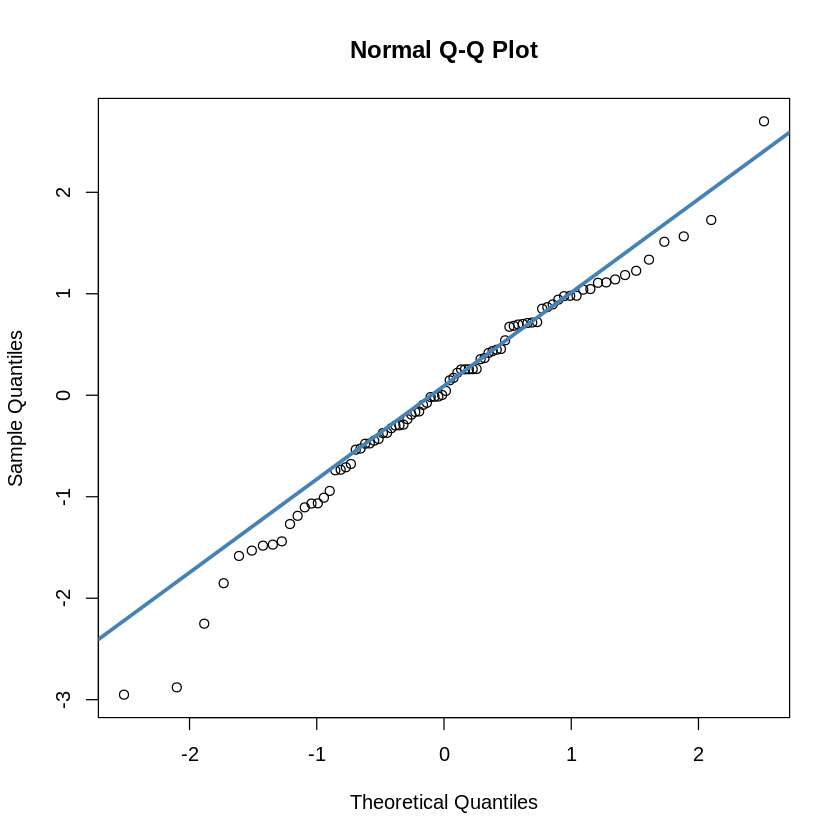

In [ ]:
lm.RStudent7 = rstudent(model7)
yhat7 <- model7$fit
qqnorm(lm.RStudent7)
qqline(lm.RStudent7, col = "steelblue", lwd = 3)

In Model 7, in addition to Model 5, only the dependent variable 'R&DCenter' was added linearly and 'Total Assets' variable was made linear again, not logarithmic. Since p-value of the new model = $2.2*e-16$, it suggests that we can reject our $H_0$ hypothesis at $\alpha$=0.05 level,it is a statistically significant model to explain its dependent variable, Net Sales.

The new model's $Adjusted R^2$ shows that model's explanatory power decreased to $64.73 percent$.

The p-values for Shapiro-Wilk and Anderson-Darling normality tests are 0.2287 fand 0.255, respectively. Although the model lost its explanatory power a little bit, normality test results show that we cannot reject our hypothesis of normality, $H_0$, which is the normal distribution of residuals at the level $\alpha=0.05$.

Normal Q-Q Chart has also been drawn for the new model. Although there are improvements in the quantile plot, it still shows an upward and downward curve, albeit not very sharp, at both ends, suggesting that the tails of the distribution are quite light compared to the assumed normal.

###**Identifying effective and outlier observations**


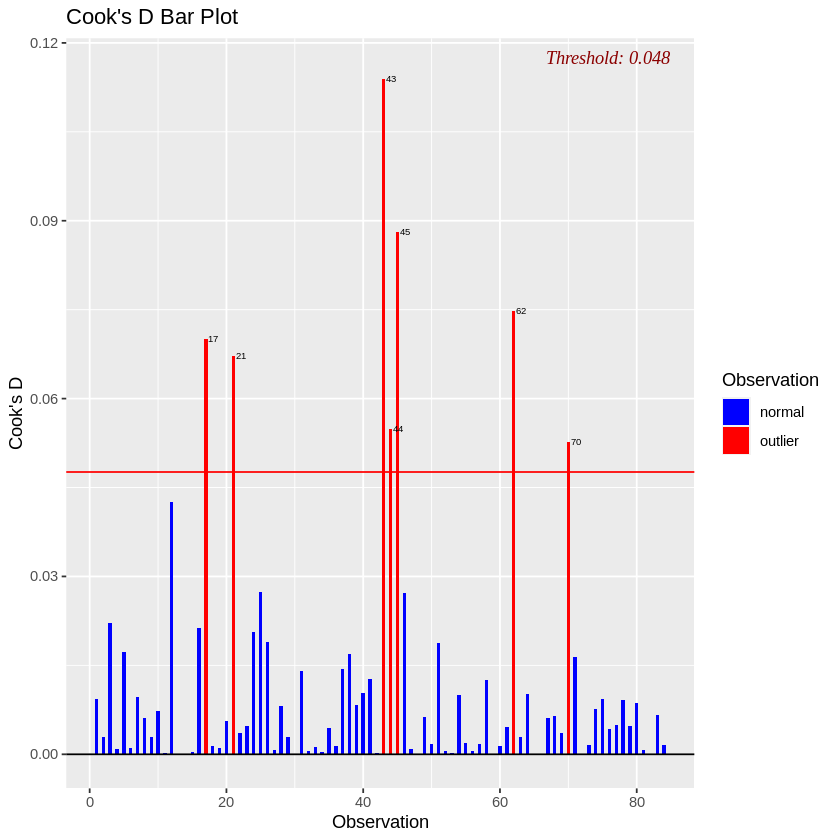

In [ ]:
#Cook's distance bar plot
ols_plot_cooksd_bar(model7)

A Bar Graph of Cook's D Distance ($D_i$) was created to identify observations that strongly affect the fit values of the model. $D_i$ is a component that reflects how well the model fits with the ith observation and measures how far that point is from the other part of the data.

To calculate the $d_i$s, the observations are deleted one by one, and the regression model is reapplied on the remaining (n − 1) observations. When the ith observation is deleted, it is examined how much all the matching values ($\hat{y}$) have changed. It is suggested that a data point with a large Cook's Distance strongly influences $\hat{y}$.

Observations (17, 21, 43, 44, 45, 62 and 70) suggested as outliers according to the Cook's Distance D method are plotted in red.

[[1]]
NULL

[[2]]
NULL


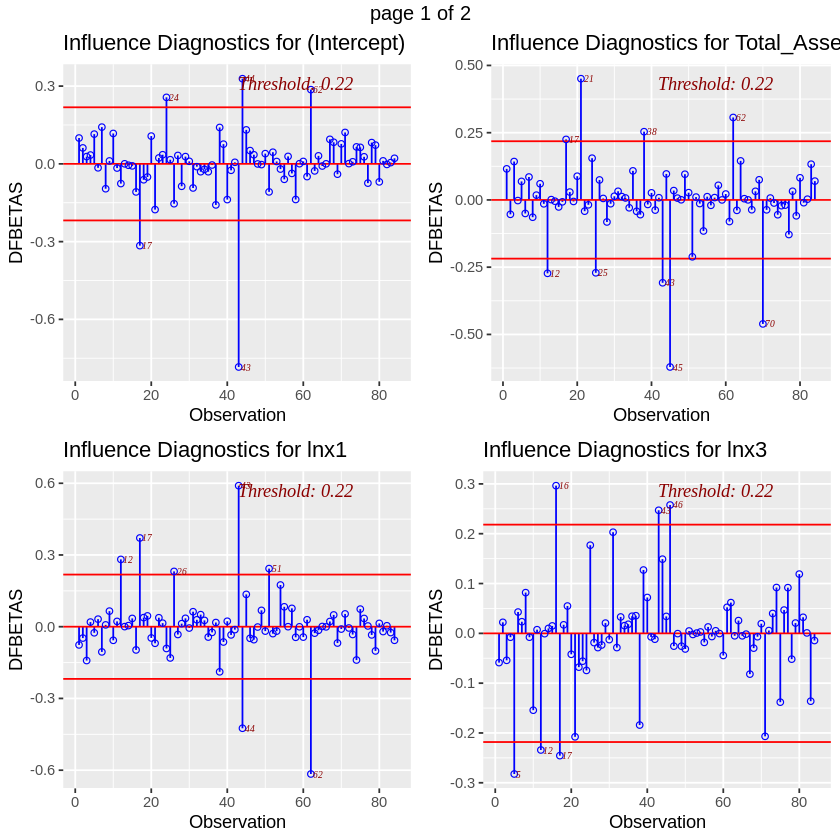

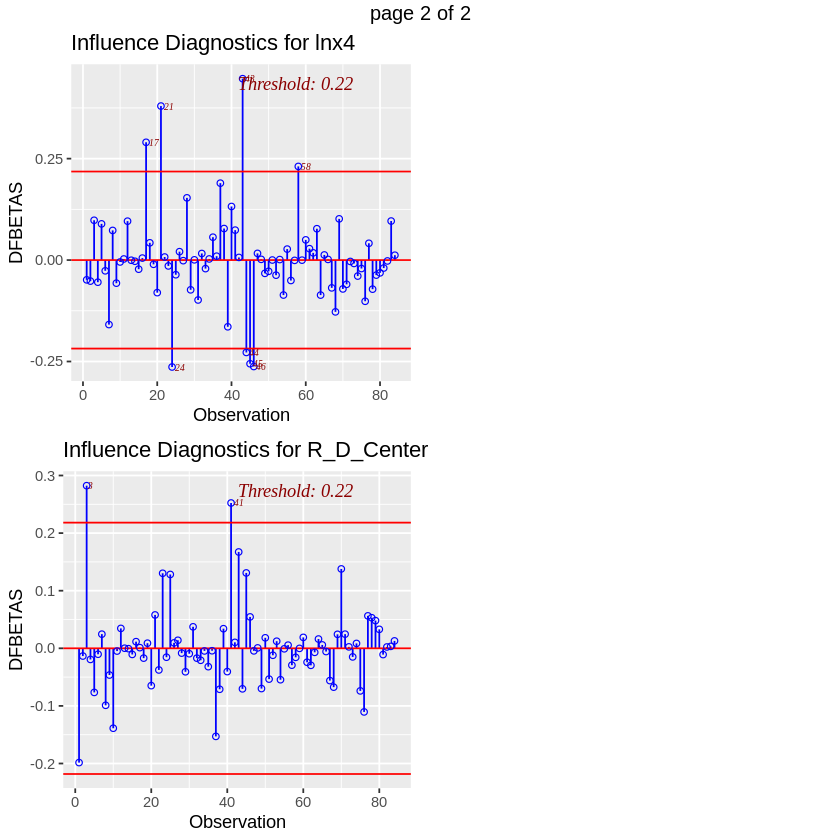

In [ ]:
#DFBETAs Panel
ols_plot_dfbetas(model7)

DFBETA measures the difference in the estimates of each parameter with and without the impact point. There is one DFBETA for each data point, so if there are n observations and k variables, there will be n ∗ k DFBETAs. In general, large DFBETAS values indicate observations that are effective in estimating a particular parameter. Belsley, Kuh, and Welsch suggest an overall cut-off of 2 and a size-adjusted threshold of $2/\sqrt{n}$ to indicate effective observations.

The graphs on the panel reveal that separate observations for each variable can cause problems.

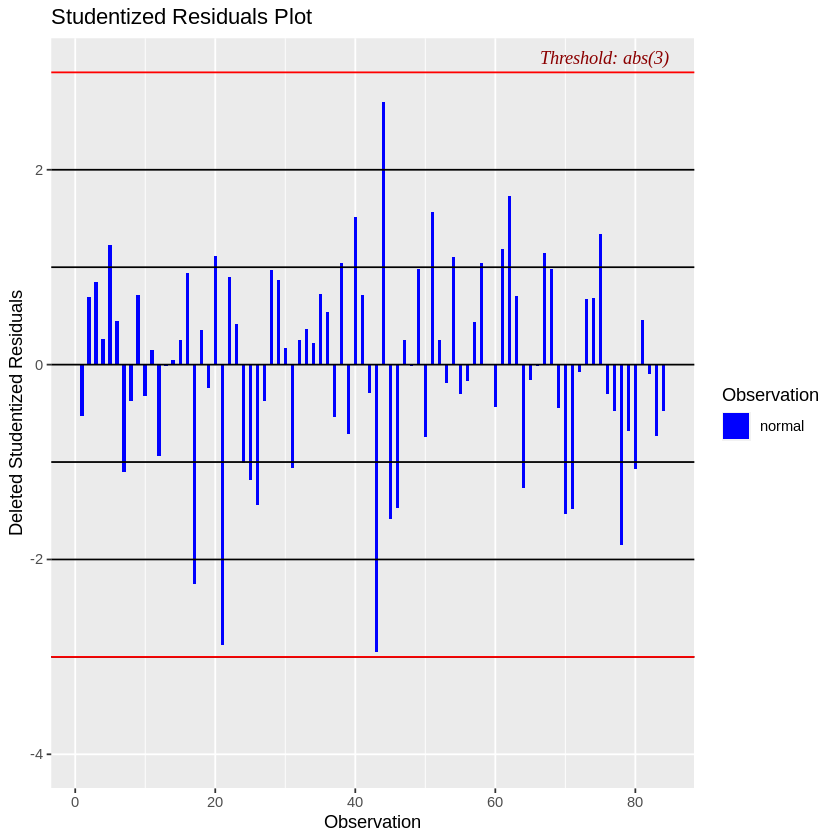

In [ ]:
#DFFITS Plot
ols_plot_resid_stud(model7)

$DFFITS_i$ is defined as the number of standard deviations that indicate change in the predictive value $\hat{y}_i$ when the ith observation is subtracted. $DFFITS_i$ is the leverage effect of the ith observation $[h_{ii}/(1-h_{ii})]^{(1/2)}$ multiplied by the R-Student value. If the data point is an outlier, the R-student will be large; if the data point has high leverage, $h_{ii}$ will approach 1 and $DFFITS_i$ will be large. $DFFITS_i$ is affected by both leverage and predictive errors. Belsley, Kuh and Welsh for any observations $|DFFITS_i| > 2 \sqrt{p/n}$ suggests that the i'thin observation should be examined. Although there are observations very close to the threshold value in this graph, an outlier could not be detected.

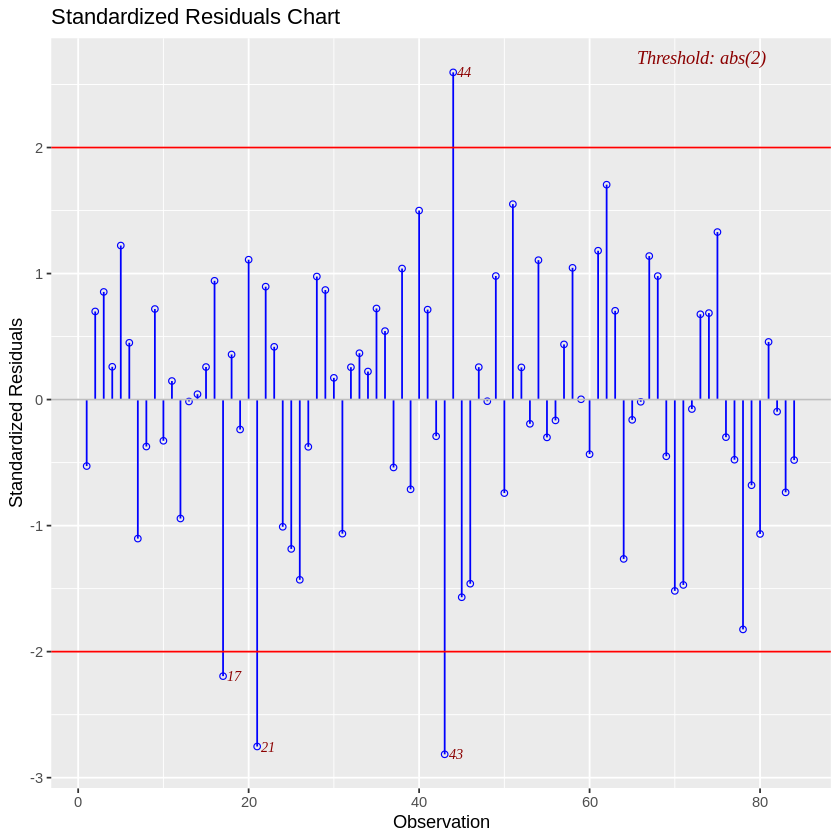

In [ ]:
#Studentized Residual Value
ols_plot_resid_stand(model7)

The Studentized Residual Graph was also prepared to detect outliers. If the value of an observation has an external studentized residual greater than 3 (as an absolute value), we can call it an outlier.

According to the graph, observations 17, 21, 43 and 44 are suggested as outliers.

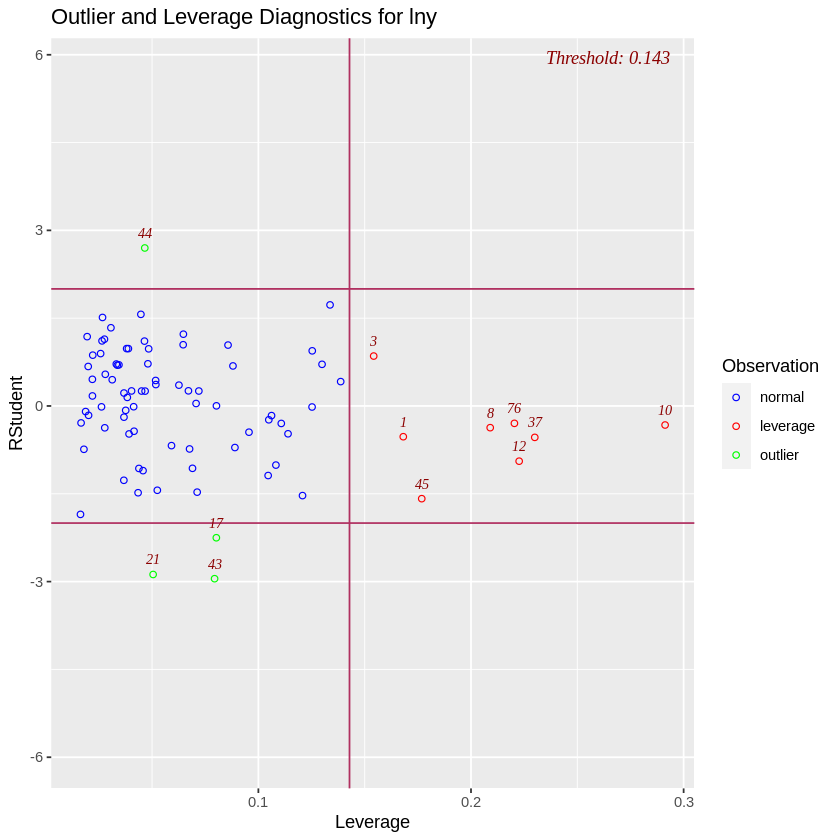

In [ ]:
#Studentized residuals and leverage plot
ols_plot_resid_lev(model7)

Finally, the Studentized Residuals vs Leverage Graph was created for the model. It is considered to be a very useful graph for the detection of effective observations. Outliers and leverage points can be classified separately.

According to the graph, observations 17, 21, 43 and 44 were found to be outliers, while observations 1, 3, 8, 10, 12, 37, 45 and 76 were determined as leverage points.

As a result, it is recommended to examine the observations 17, 21, 43 and 44, which are suggested as outliers by different tests.

###**New Model Creation after Outliers are Removed**

In [ ]:
startup_out <- startup_rev[-c(17,21,43,44), ]
head(startup_out)

Total_Assets,Equity,Net_Sales,R_D_Expenditure,Marketing_Dist_Costs,Profit,Size,Small_Business_Support,Research_Support,R_D_Center,Design_Center
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
7028209,4767390,8261964,673637,1780736,1542196,small,19658,260314,1,0
5654483,1894556,7196762,3410,102069,302065,small,15000,73329,0,0
35429803,11484033,29874432,579794,184436,341652,mid,12900,225564,1,0
20051379,11203395,20244167,650535,1389077,1282678,mid,8188,16121,0,0
13727706,3664019,15201885,5000,369992,429764,mid,1800,174135,0,0
10347426,7176181,12919656,3730,684226,1806305,mid,29274,91070,0,0


In [ ]:
lny_8 <- log(startup_out$Net_Sales)
lnx1_8 <- log(startup_out$Marketing_Dist_Costs)
lnx2_8 <- log(startup_out$Total_Assets)
lnx3_8 <- log(startup_out$Small_Business_Support)
lnx4_8 <- log(startup_out$Research_Support)

model8 <- lm(lny_8 ~ lnx1_8+Total_Assets+lnx2_8+lnx3_8+lnx4_8+R_D_Center, data = startup_out)
summary(model8)
kable(coef(model8), digits = 3, col.names = "Parameters", format.args = list(big.mark = ",", scientific = FALSE))


Call:
lm(formula = lny_8 ~ lnx1_8 + Total_Assets + lnx2_8 + lnx3_8 + 
    lnx4_8 + R_D_Center, data = startup_out)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33710 -0.22494 -0.01669  0.30435  0.96017 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.752e+00  1.905e+00   1.970   0.0526 .  
lnx1_8        1.829e-01  3.628e-02   5.042 3.25e-06 ***
Total_Assets  2.129e-09  7.839e-09   0.272   0.7867    
lnx2_8        6.582e-01  1.231e-01   5.346 9.86e-07 ***
lnx3_8        4.662e-02  4.527e-02   1.030   0.3065    
lnx4_8       -9.397e-02  4.691e-02  -2.003   0.0489 *  
R_D_Center   -5.104e-02  1.578e-01  -0.323   0.7473    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4298 on 73 degrees of freedom
Multiple R-squared:  0.8003,	Adjusted R-squared:  0.7839 
F-statistic: 48.76 on 6 and 73 DF,  p-value: < 2.2e-16




|             | Parameters|
|:------------|----------:|
|(Intercept)  |      3.752|
|lnx1_8       |      0.183|
|Total_Assets |      0.000|
|lnx2_8       |      0.658|
|lnx3_8       |      0.047|
|lnx4_8       |     -0.094|
|R_D_Center   |     -0.051|

In [ ]:
shapiro.test(model8$residuals)

ad.test(model8$residuals)


	Shapiro-Wilk normality test

data:  model8$residuals
W = 0.97173, p-value = 0.07313



	Anderson-Darling normality test

data:  model8$residuals
A = 0.64872, p-value = 0.08734


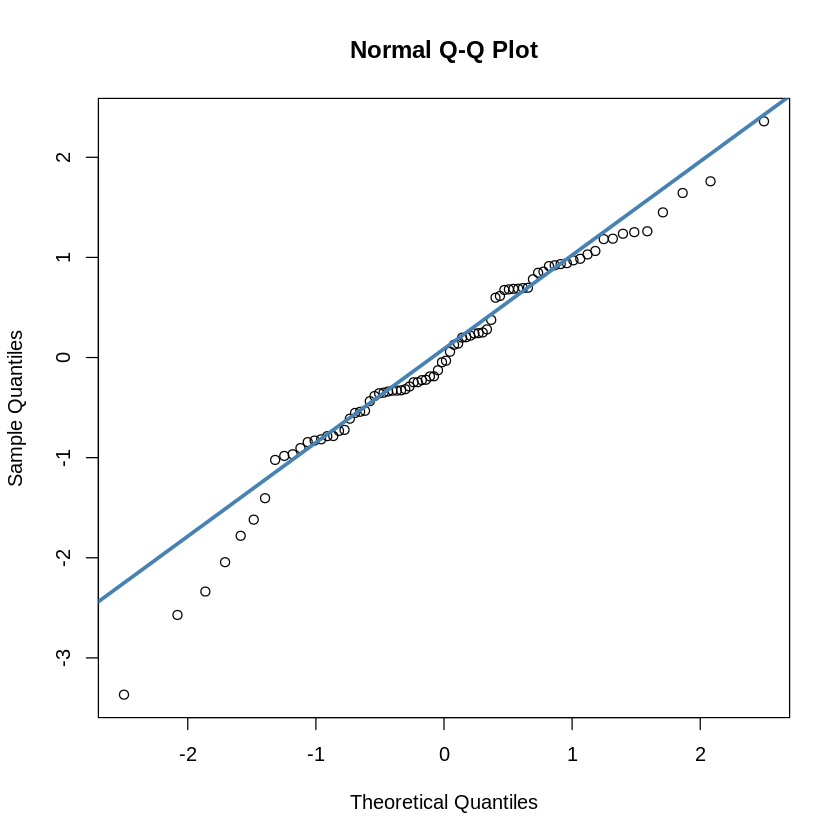

In [ ]:
lm.RStudent8 = rstudent(model8)
yhat8 <- model8$fit
qqnorm(lm.RStudent8)
qqline(lm.RStudent8, col = "steelblue", lwd = 3)

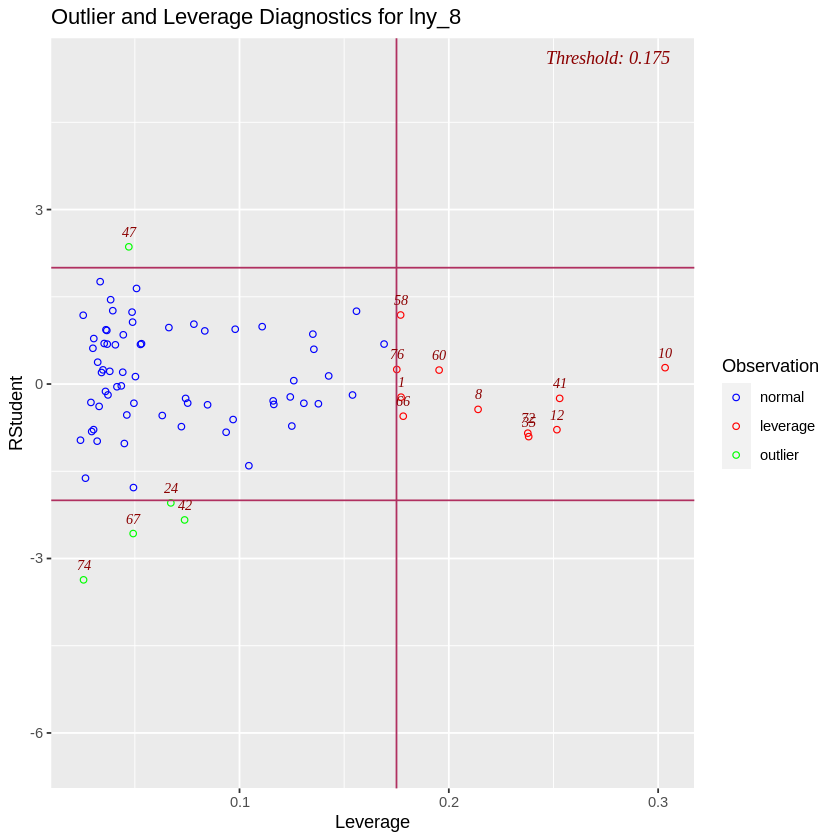

In [ ]:
ols_plot_resid_lev(model8)

***No error was detected in the outlier observations. For this reason, a rational justification for their removal cannot be presented in reality. There may be a discrepancy due to sectoral differences, but more detailed information is required in order to have an opinion. Model 8 was created by removing these observations for experimental purposes only.***

Model 8 was created by removing observations 17, 21, 43 and 44, which were suggested to be outliers by different tests. Since p-value of the new model = $2.2*e-16$ suggests that we can reject our $H_0$ hypothesis at $\alpha$=0.05 level, it is a statistically significant model to explain its dependent variable, Net Sales.

$Adjusted R^2$ value shows the new model's increasing explanatory value of the model to $78.39$. By losing 4 observations, the explanatory power was be improved by approximately $14$ $percent$. Also, the p-values for Shapiro-Wilk (0.073) and Anderson-Darling (0.087) normality tests suggests that we cannot reject our hypothesis of normality, so the residuals are normally distributed.

A Normal Q-Q Chart has also been drawn for the new model. The quantile chart has improved as expected, but it still shows an upper-downward curve.

The Studentized Residual and Leverage Graph prepared for the new model also suggests two new outliers and the values ​​can be considered very close to the threshold limits. When these observations were removed and the model was re-analyzed, it was decided to remain in the sample since its explanatory power again fell below 65%.

##**Evaluation of Step-3 and Plan for Step-4**

By adding the Research and Small Business Support numeric variables in addition to R&D Center categorical variable to the model, alternative relationships between the variables were tested. Accordingly, the final model created can be written as:

$$lna( y)=3.752+1.83*10 ^{-1}*lna(x_1)+2.13*10^{-9}*x_2+6.58*10^{-1}*lna(x_3)+ 4.66*10^{-2}*lna(x_4)-9.4*10^{-2}*x5-5.1*10^{-2}*x6 +\epsilon$$

_Model results can be interpreted as follows:_

- Adjusted R^2 = 0.7839 of the new model, and the explanatory power of the model increased to 78.39 percent. After examining and identifying the outliers, the explanatory power was improved by ~14 percent by removing 4 observations.

- “Total Assets” variable not only has an effect close to zero but also statistically insignificant.

- It is suggested that increasing the "Research Supports (x4)" variable by 1 percent, while all other variables are constant, can decrease Net Sales. However, the p-value of 0.04892 is quite close to insignificance at the α=0.05 level.

- “Small Business Supports (x3)” and “R&D Centers (x5)” variables do not give statistically significant results at the level of α=0.05.

In final step, we will perform stepwise regression and select the final model.

#**Step-4: Stepwise Regression and Final Model Selection**

In [ ]:
startup_rev2 <- read_excel("startup_rev2.xlsx")
model9 <- lm(lny~.,startup_rev2)
t <- ols_step_best_subset(model9)
kable(t, digits = 2)



|    | mindex|  n|predictors                               | rsquare| adjr| predrsq|    cp|    aic|    sbic|    sbc| msep|  fpe|  apc| hsp|
|:---|------:|--:|:----------------------------------------|-------:|----:|-------:|-----:|------:|-------:|------:|----:|----:|----:|---:|
|2   |      1|  1|lnx2                                     |    0.72| 0.71|    0.70| 55.19| -16.15| -247.87|  -8.97| 3.70| 0.05| 0.30|   0|
|20  |      2|  2|lnx2 lnx5                                |    0.79| 0.78|    0.77| 24.03| -37.55| -268.57| -27.97| 2.81| 0.04| 0.23|   0|
|88  |      3|  3|lnx2 lnx5 x9                             |    0.83| 0.83|    0.82|  4.27| -55.65| -285.13| -43.68| 2.22| 0.03| 0.18|   0|
|204 |      4|  4|lnx2 lnx4 lnx5 x9                        |    0.84| 0.83|    0.82|  4.61| -55.41| -284.57| -41.04| 2.20| 0.03| 0.18|   0|
|350 |      5|  5|lnx2 lnx4 lnx5 lnx7 x9                   |    0.84| 0.83|    0.82|  6.38| -53.65| -282.64| -36.89| 2.22| 0.03| 0.19|   0|
|456 |      6|  6|

In the variable selection and model building method, the model that satisfies some objective criteria such as having the largest adjusted value of $R^2$ or the smallest MSE, Mallow's Cp or AIC will be selected as the predictive subset.

In the last sub-sample determined within the scope of Step 3, there were 81 observations for 11 variables, and when Net Sales from these variables is determined as dependent, 10 independent variables remain. The Design Centers variable was excluded from the model because only one firm with a design center remained in the sub-sample.

Stepwise regression method was applied for the remaining 9 independent variables. The best model at the end of each step is summarized in the table below.

In [ ]:
model_10 <- lm(lny~lnx2+lnx5+x9,startup_rev2)
anova(model_10)
kable(coef(model_10), digits = 3, col.names = "Parameters", format.args = list(big.mark = ",", scientific = FALSE))
vif(model_10)
summary(model_10)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
lnx2,1,9.1521283,9.15212829,334.18294,9.785757e-30
lnx5,1,0.9049581,0.90495812,33.04385,1.722395e-07
x9,1,0.5939518,0.59395176,21.68769,1.316250e-05
Residuals,77,2.1087668,0.02738658,NA,NA




|            | Parameters|
|:-----------|----------:|
|(Intercept) |      2.562|
|lnx2        |      0.474|
|lnx5        |      0.170|
|x9          |      0.279|

lnx2     lnx5       x9 
2.519222 1.275307 2.353422


Call:
lm(formula = lny ~ lnx2 + lnx5 + x9, data = startup_rev2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47788 -0.09214 -0.00761  0.09942  0.53670 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.56238    0.48443   5.289 1.12e-06 ***
lnx2         0.47382    0.07447   6.363 1.30e-08 ***
lnx5         0.17021    0.03178   5.356 8.54e-07 ***
x9           0.27867    0.05984   4.657 1.32e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1655 on 77 degrees of freedom
Multiple R-squared:  0.8347,	Adjusted R-squared:  0.8283 
F-statistic: 129.6 on 3 and 77 DF,  p-value: < 2.2e-16


In [ ]:
shapiro.test(model_10$residuals)

ad.test(model_10$residuals)


	Shapiro-Wilk normality test

data:  model_10$residuals
W = 0.97761, p-value = 0.1673



	Anderson-Darling normality test

data:  model_10$residuals
A = 0.53859, p-value = 0.1625


The new model's $Adjusted R^2$ of 0.8283 means that the model's explanatory power raised to $82.83$ percent. The p-values for Shapiro-Wilk (0.1673) and Anderson-Darling (0.1625) normality tests suggests that we cannot reject our hypothesis of normality, so the residuals are normally distributed.

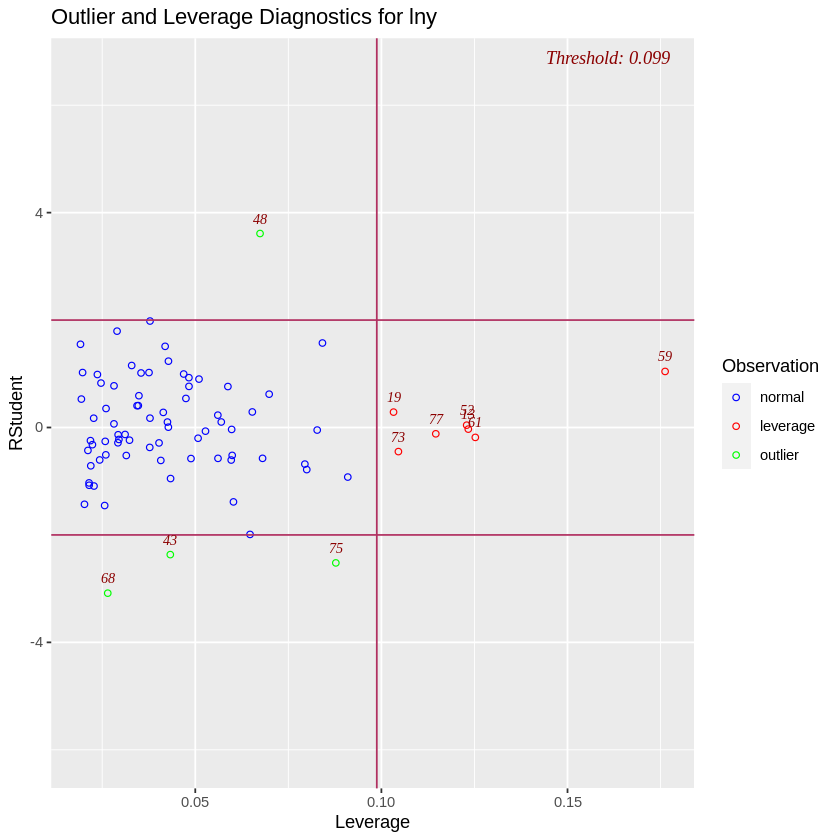

In [ ]:
ols_plot_resid_lev(model_10)

#**Conclusion**

In this project, we created a multiple linear regression model to predict Net Sales of startups in Turkey based on variety of factors. We adopted an iterative approach by adding/removing variables and modifying individual observations. Accordingly,

**In Step-1,** we created a single variable linear regression model and investigated the linear relationship between the variables 'Marketing_Dist_Costs' and 'NetSales'. Although the model was found to be statistically significant at $\alpha$ = 0.05 confidence level, it was evaluated that outliers and changing variance problems in the data may corrupt the model.

Hence, **in Step-2** we created several multiple regression models with different variables. Unfortunately, normality tests and residual analyzes revealed that improvements should be made on the models because basic assumptions such as constant variance and normal distribution of residuals cannot be met.

This brought us to the **Step-3**. Model interventions such as Variance-Stabilizing Transformations, removing effective observations, adding dummy variables and investigating functional relations was evaluated in order to deal with variance inequalities and normality problems in this step.



Until this point, general structure of the model was shaped. However, final model and parameter selection was done based on the stepwise regression analysis. In the table, the highest value for adjusted 𝑅2 indicates the best model, and the lowest values for all other criteria indicate the best model. In order to facilitate the comparison, conditional coloring has been made to switch from green to red when going from the best option to the worst option. The best model at the end of each step is summarized in the table below:

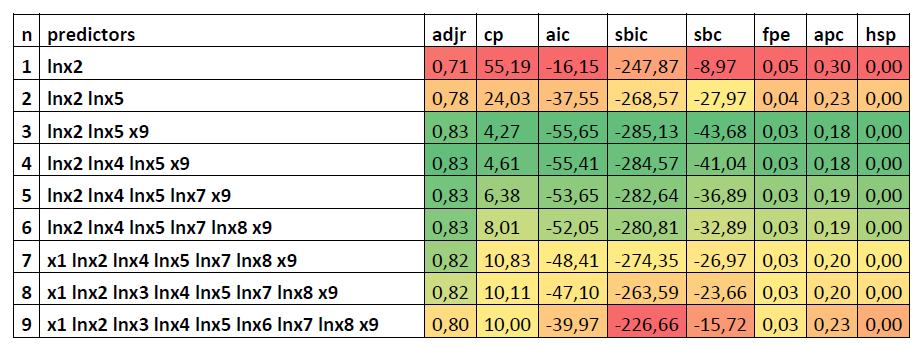

We could reach the highest adjusted 𝑅2 values and the lowest Mallow's Cp, Akaike Information Criteria (AIC), Sawa's Bayesian Information Criteria (SBIC), Schwarz Bayesian Criteria (SBC), Final Prediction Error (FPE), Hocking's Sp (HSP) and Amemiya Prediction Criteria (APC) values in 3- and 4-variable models.

The best 3-variable model includes Total Assets, Marketing and Distribution Expenses and Firm Size.

In the best 4-variable model, there is an additional R&D Expensesvariable.

While the added R&D Expenses variable increased the explanatory power of the model by only 0.15%, it caused a decrease in Mallow's Cp and many other criteria. For this reason, it was decided to prefer the 3-variable model.

In conclusion, our final model based on variable selection by stepwise regression method can be expressed as follows:

$𝐥𝐧(𝒚)=𝟐.562+𝟎.474∗𝐥𝐧(𝒙𝟐)+𝟎.17∗𝐥𝐧(𝒙𝟓)+𝟎.𝟐79∗𝒙𝟗+𝝐$

Normality and variance analyzes were carried out for the model, and nothing that would adversely affect the model was determined.

The model can explain the change in Net Sales by ~83%. Holding all other variables constant:

*   Increasing the “Total Assets (x2)” variable by 1% increases Net Sales by 0.474%.
*   Increasing the “Marketing and Distribution Costs (x5)” variable by 1% can increase Net Sales by 0.17%.
*   It is suggested that a medium-sized business can make 0.279% higher Net Sales than a small business.

**In this context, it can be suggested that businesses can increase their marketing and distribution expenses with their total assets in order to increase their net sales.**